In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 7.단별량 수치형 변수 시각화

## (1)위도의 빈도표를 시각화: plot.hist, hist, sns,displot,sns.histplot

<Axes: ylabel='Frequency'>

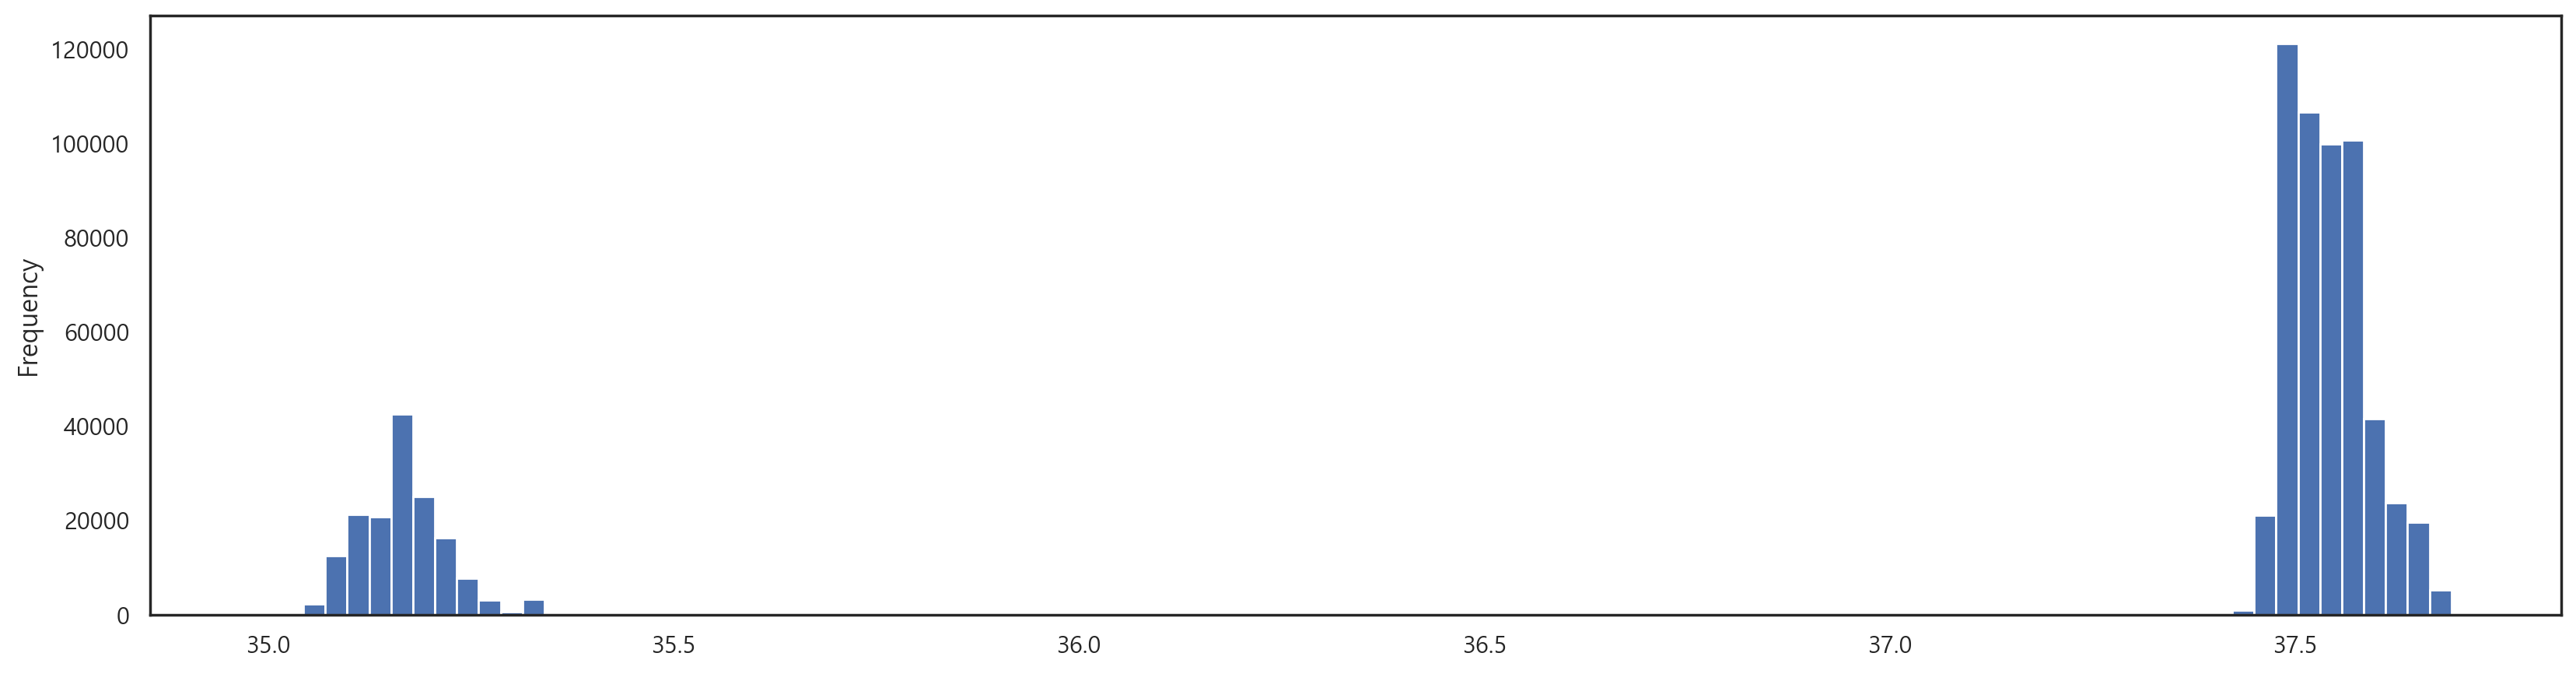

In [212]:
df['위도'].plot.hist(bins=100)

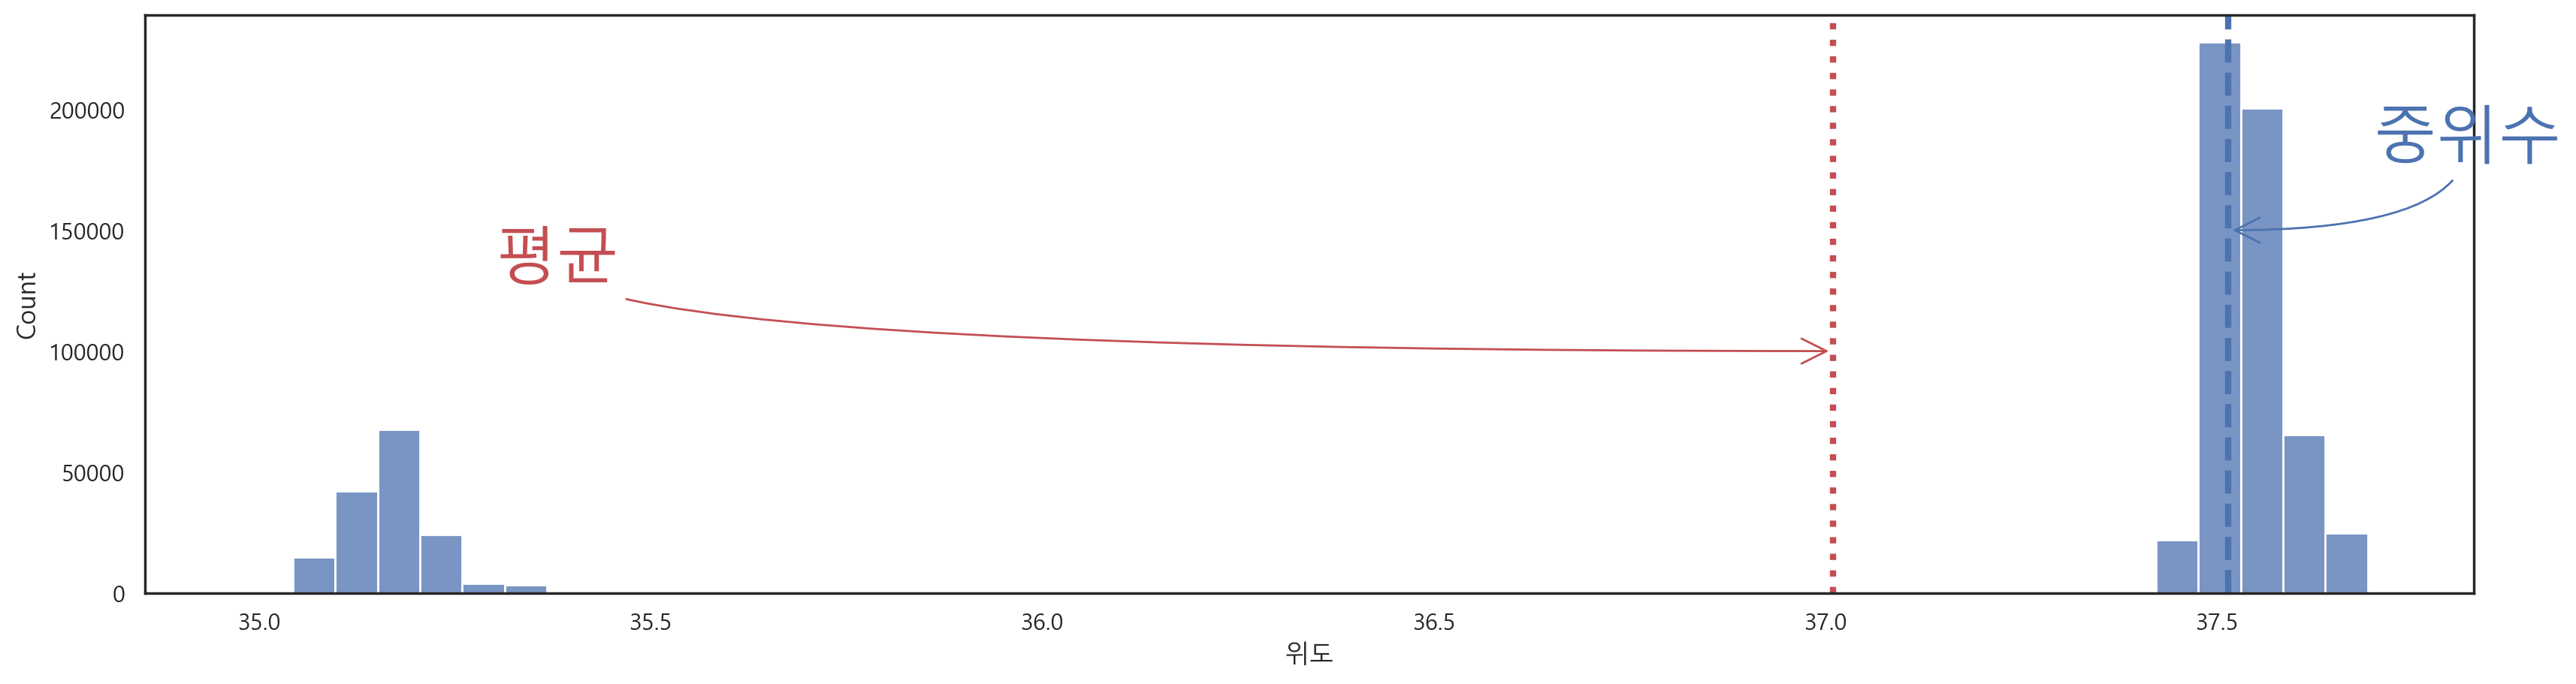

In [259]:
sns.histplot(data=df, x='위도', bins=50)
plt.axvline(df['위도'].mean(),color='r', linestyle=':', linewidth=3)
plt.annotate('평균', 
             xytext=(35.3,130000),
             xy=(df['위도'].mean(),100000),
             arrowprops=dict(arrowstyle='->',
                           connectionstyle='angle3', color='r'),fontsize=30, color='r')
plt.axvline(df['위도'].median(), color='b', linestyle='--', linewidth=3)

plt.annotate('중위수', xytext=(37.7,180000),
            xy=( df['위도'].median(),150000),
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='angle3',color='b'),fontsize=30, color='b')

plt.show()

In [251]:
# 왜도 : 평균을 기준으로 치우친 정도
# 오른쪽으로 치우침 : 음수 평균<중위수
# 왼쪽으로 치우침 : 양수  중위수<평균

df['위도'].skew()

-1.3235077358631402

## (2) 경도의 빈도표를 시각화: plot.hist, hist, sns.displot, sns.histplot

Text(126.7, 60000, '중위수')

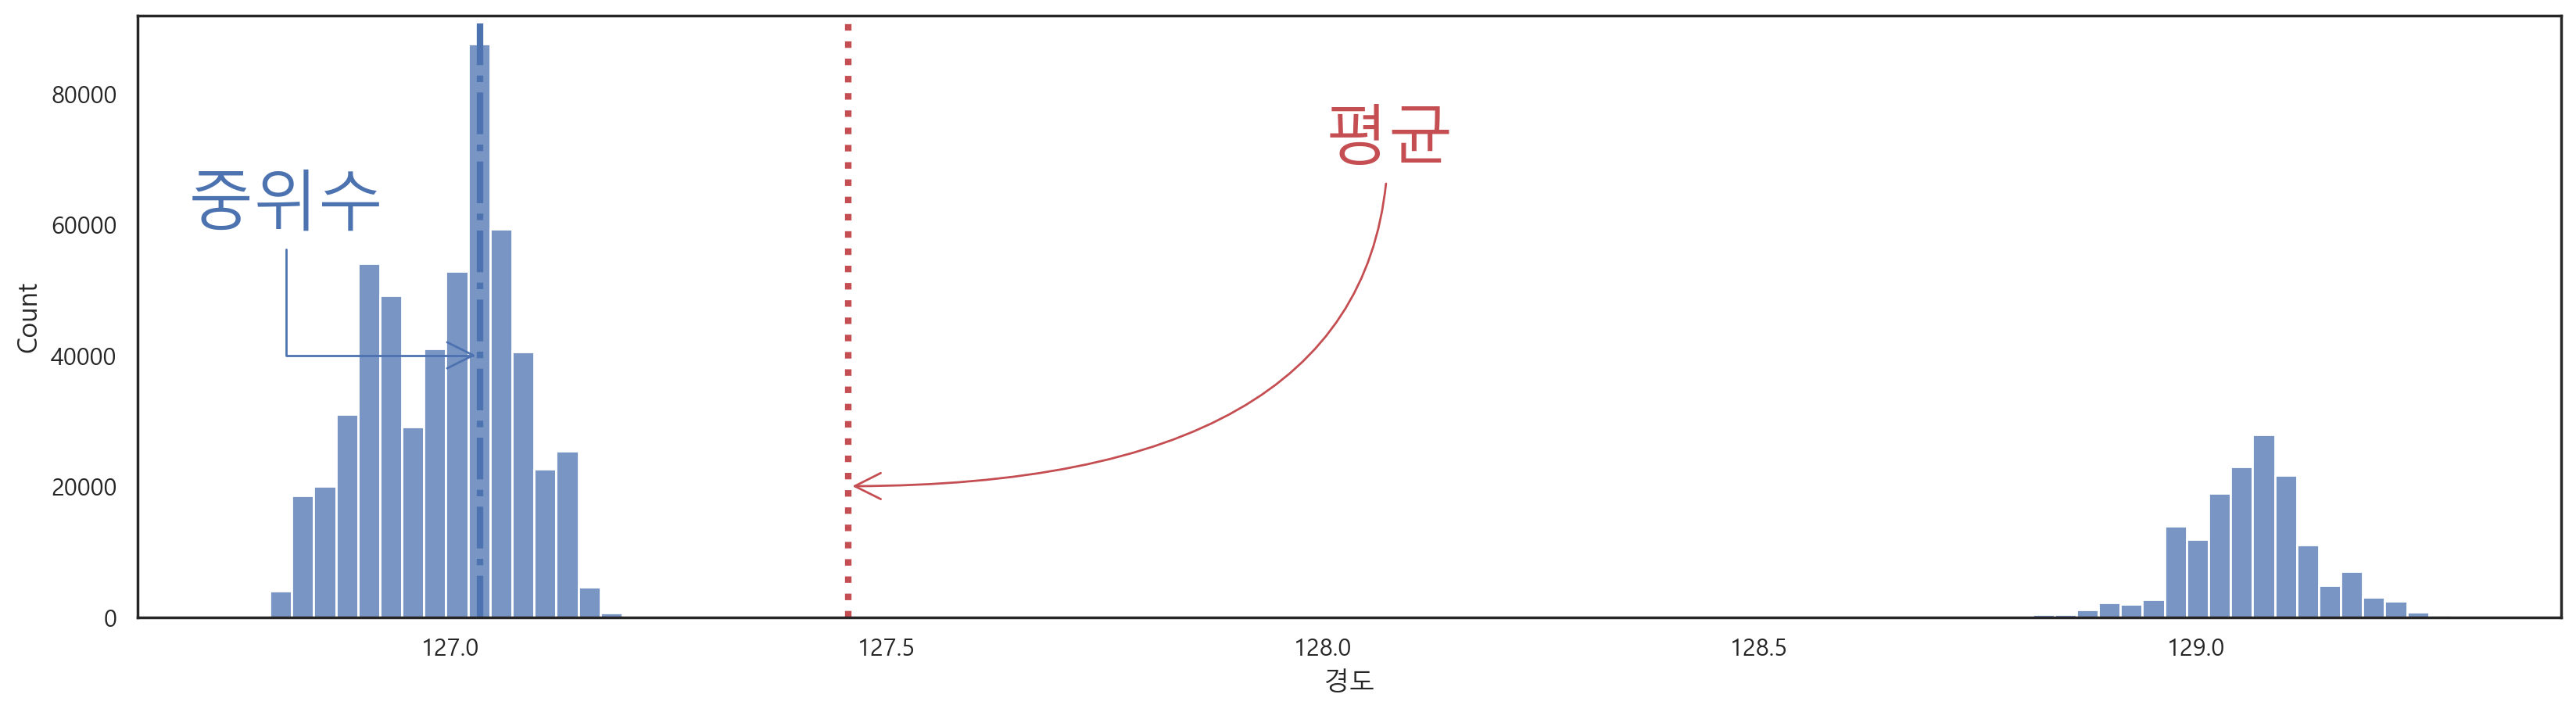

In [276]:
sns.histplot(data=df,x='경도',bins=100 )
plt.axvline(df.경도.mean(),color='r', linewidth=3, linestyle=':')
plt.annotate('평균', 
             xytext=(128,70000),
             xy=(df['경도'].mean(),20000),
             arrowprops=dict(arrowstyle='->',
                           connectionstyle='angle3', color='r'),fontsize=30, color='r')


plt.axvline(df.경도.median(),color='b', linestyle='-.', linewidth=3)
plt.annotate('중위수', 
             xytext=(126.7,60000),
             xy=(df['경도'].median(),40000),
             arrowprops=dict(arrowstyle='->',
                           connectionstyle='angle', color='b'),fontsize=30, color='b')


# 8. 상관계수
-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.\
 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)


## (1) 전체 숫자 컬럼끼리의 상관계수

In [279]:
corr = df.corr(numeric_only=True)
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057312,0.169355,-0.189570
건물본번지,0.057312,1.000000,-0.005815,0.012164
경도,0.169355,-0.005815,1.000000,-0.993565
위도,-0.189570,0.012164,-0.993565,1.000000


## (2)상관계수를 이용하여 heatmap 시각화
참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

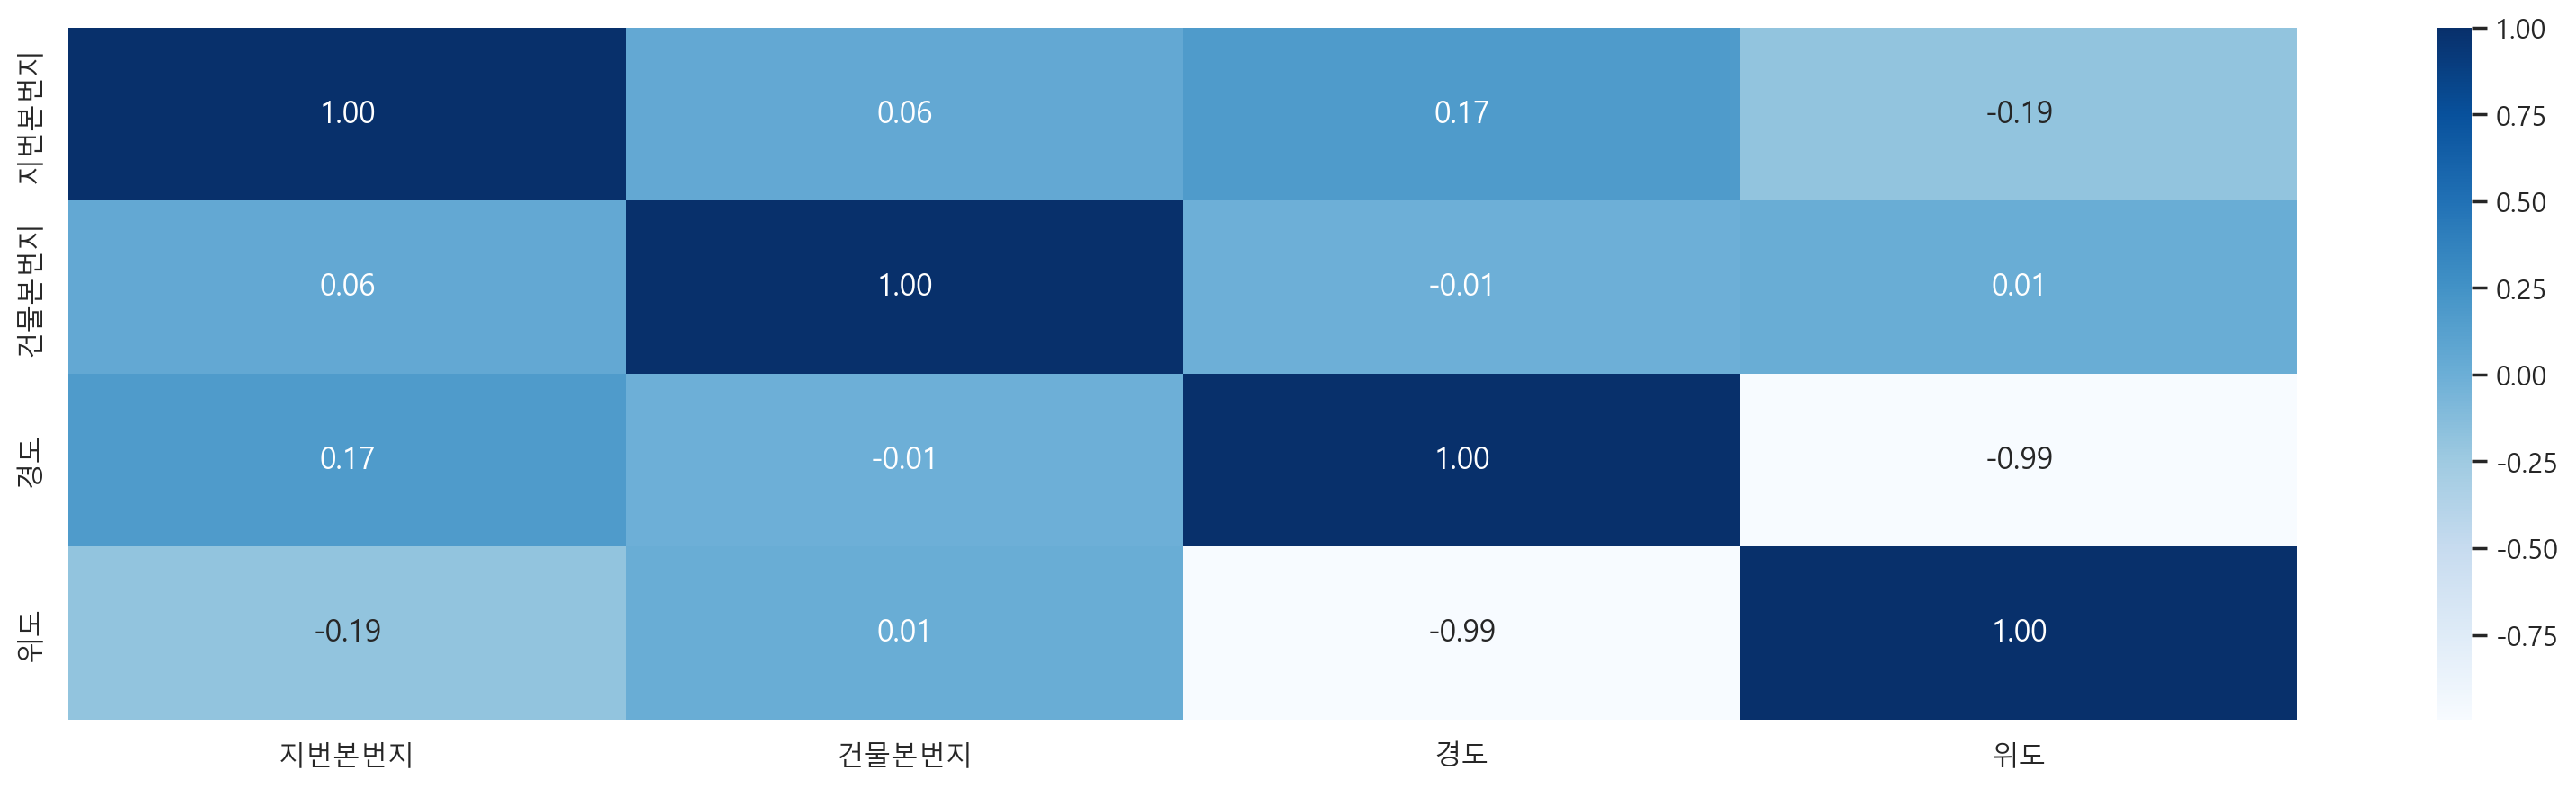

In [283]:
#히트맵 그리기 
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues') #1차 수업이서는 이렇게 배웠으나 지금하는것에서는 아래처럼 하면 됨. 
plt.show()

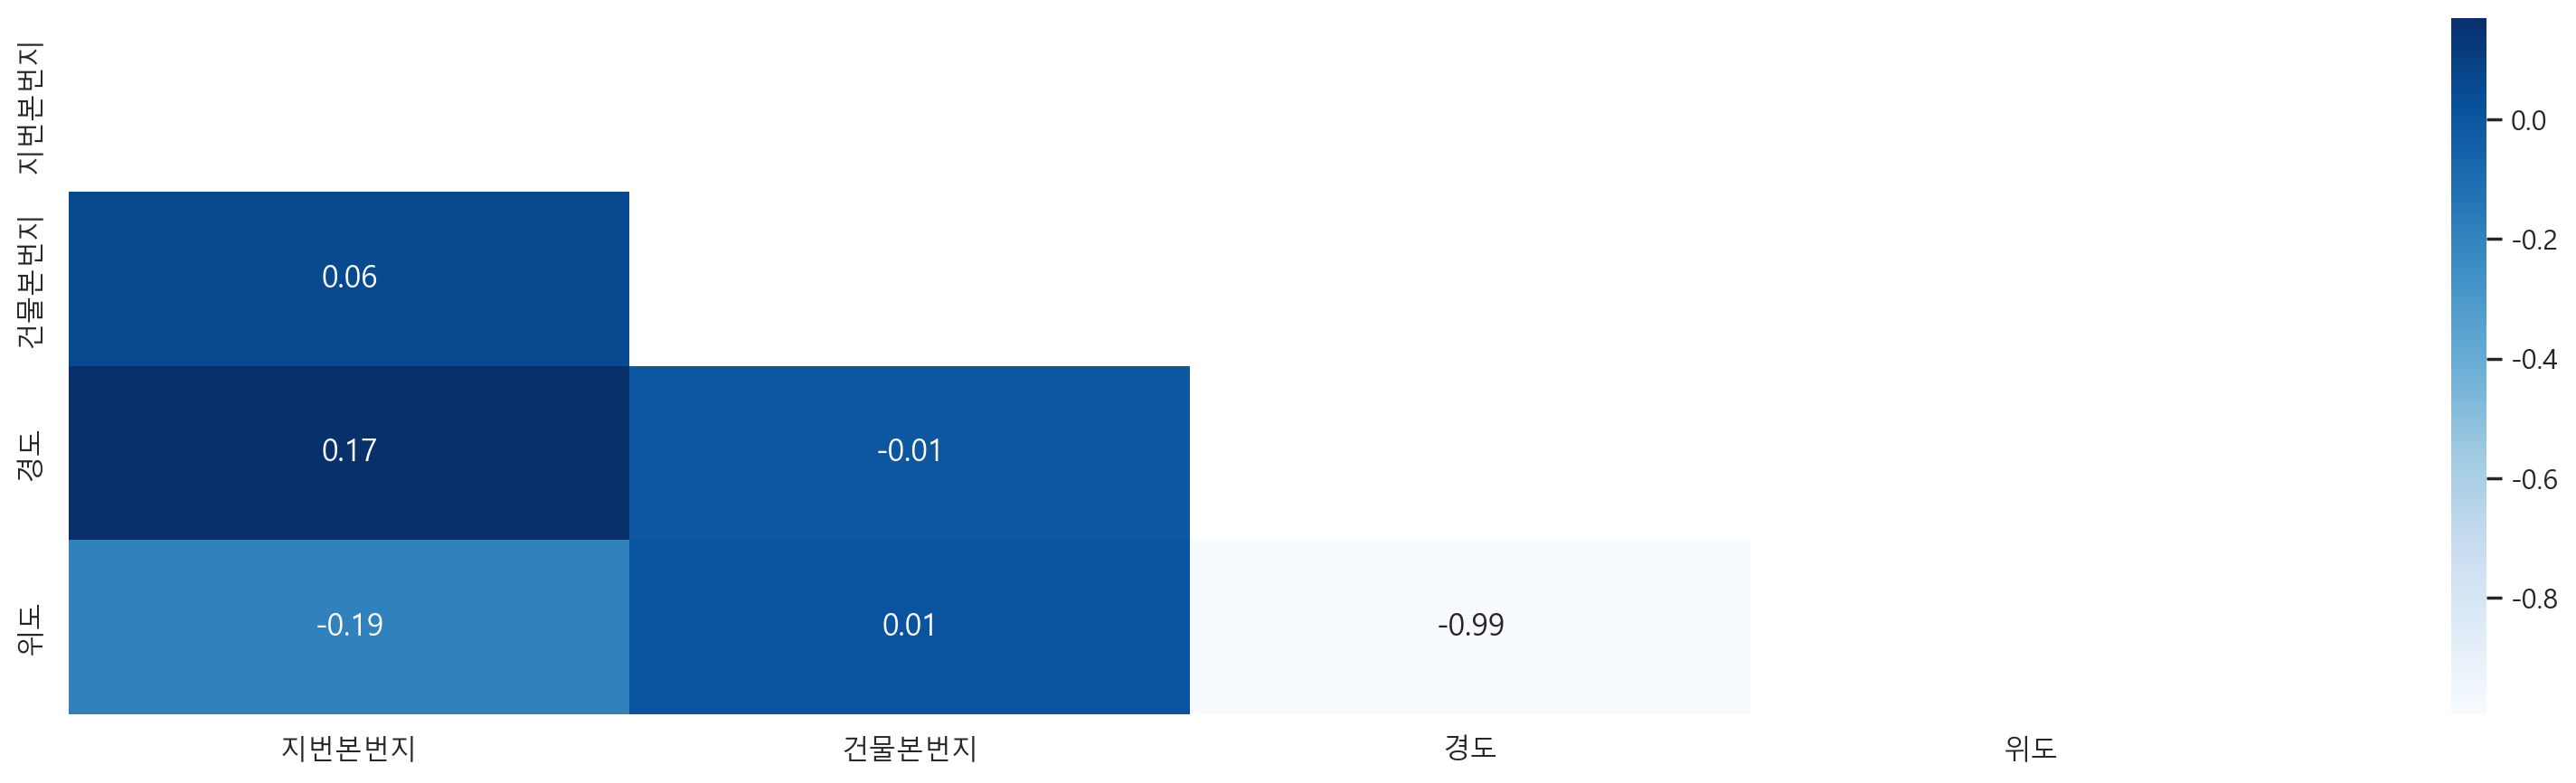

In [286]:
mask = np.triu(np.ones_like(corr, dtype=bool))  #ones_like는 무엇인가 / triu는 무엇인가
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',mask=mask) #1차 수업이서는 이렇게 배웠으나 지금하는것에서는 아래처럼 하면 됨. 
plt.show()

In [291]:
a = np.array([[1,1],
              [1,1]]) #2행2열짜리 변수를 a에 할당함. 

In [292]:
a # 2행2열짜리 배열

array([[1, 1],
       [1, 1]])

In [299]:
#ones와 oneslike차이

np.ones((2,2)) #입력한 숫자대로 만들어줌
np.ones_like(n) #입력된 변수와 같은 구조의 배열로 만들어짐

array([[1., 1.],
       [1., 1.]])

In [293]:
np.ones_like(a) #a변수와 구조가 같은 배열에 1로 

array([[1, 1],
       [1, 1]])

In [290]:
np.ones((2,2),dtype=bool) #float타입으로 기본 설정  / 매개변수에 온 구조에 배열에 1로 넣기 

array([[ True,  True],
       [ True,  True]])

In [305]:
temp = np.ones_like(corr, dtype=bool) #corr 변수와 구조가 같은 배열에 1을 넣기

In [306]:
#삼각행렬을 만드는 
np.triu(temp)

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

In [310]:
#삼각행렬을 만드는 함수 (0기 기본값)
np.triu(temp, k=1)
np.triu(temp, k=0)

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

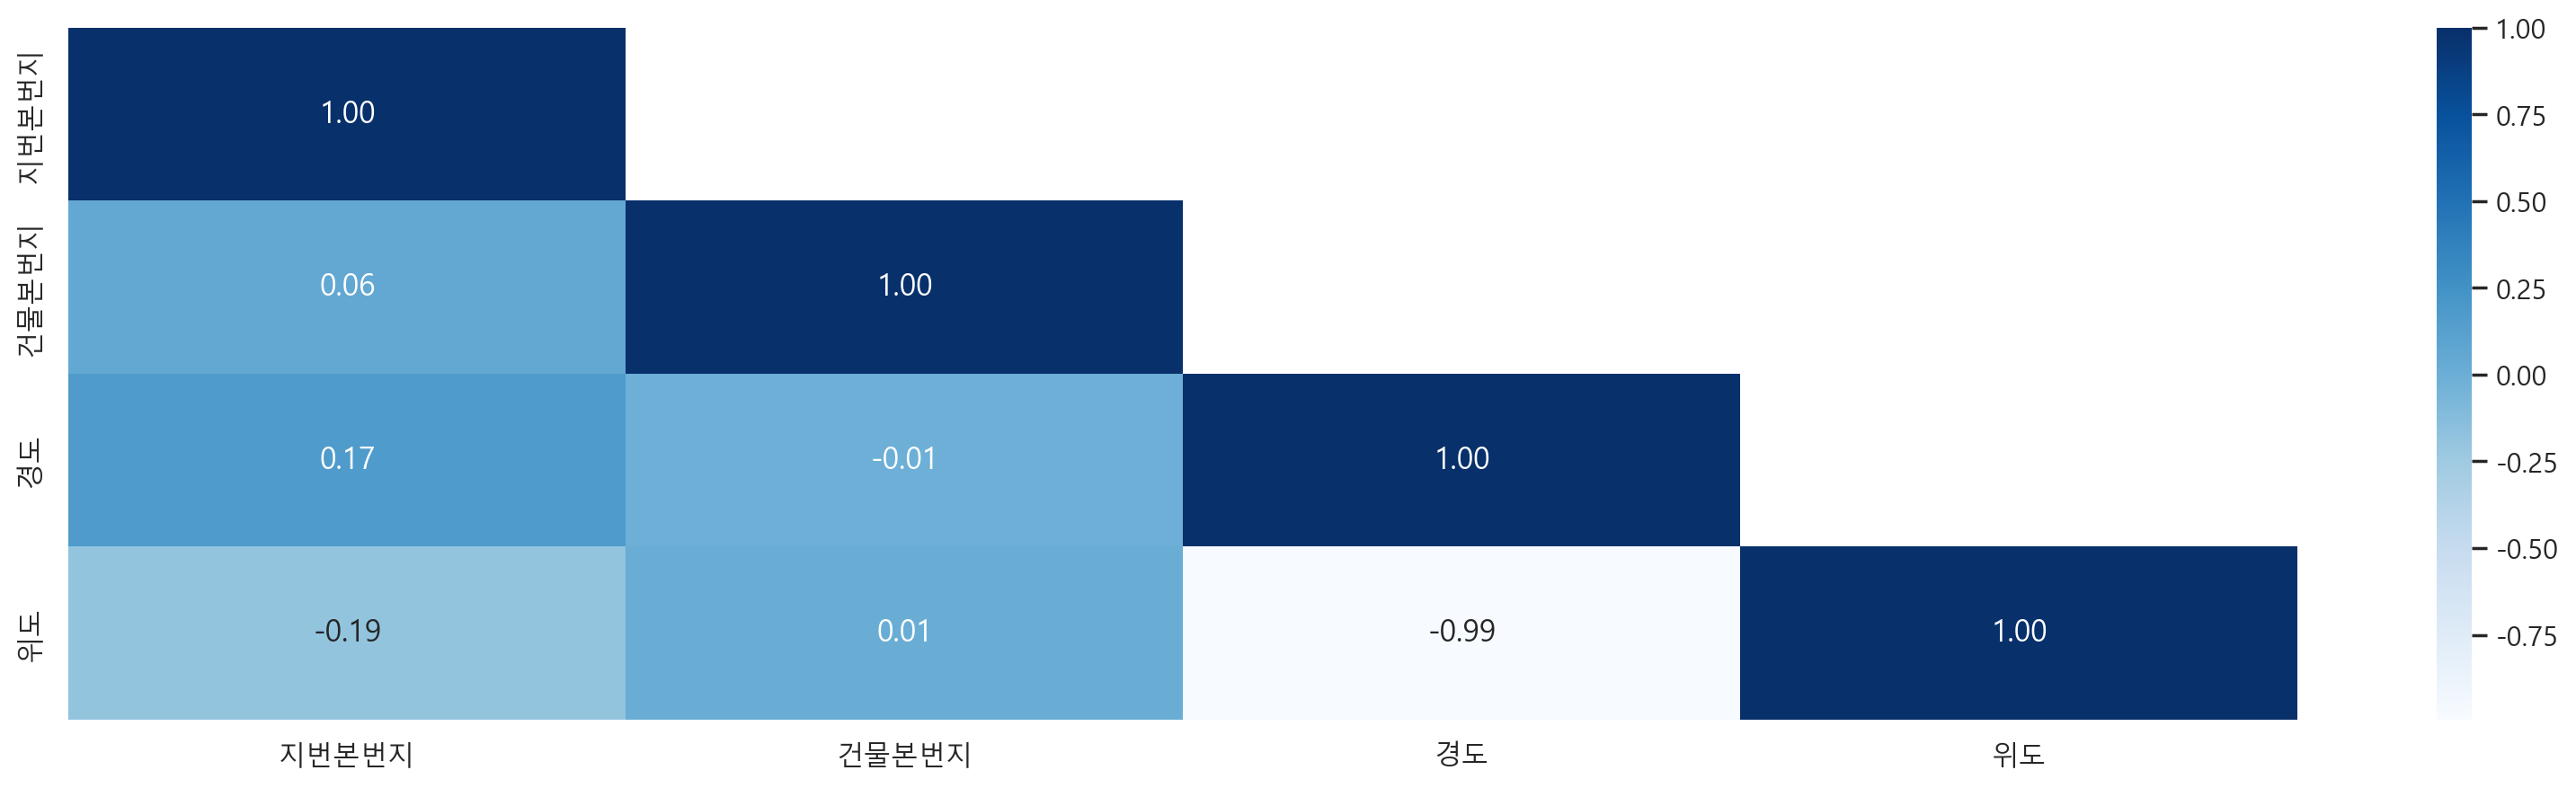

In [318]:
#mask k값에 따라서 true와 false를 통해 heatmap 설정이 가능 
mask=np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',mask=mask)
plt.show()

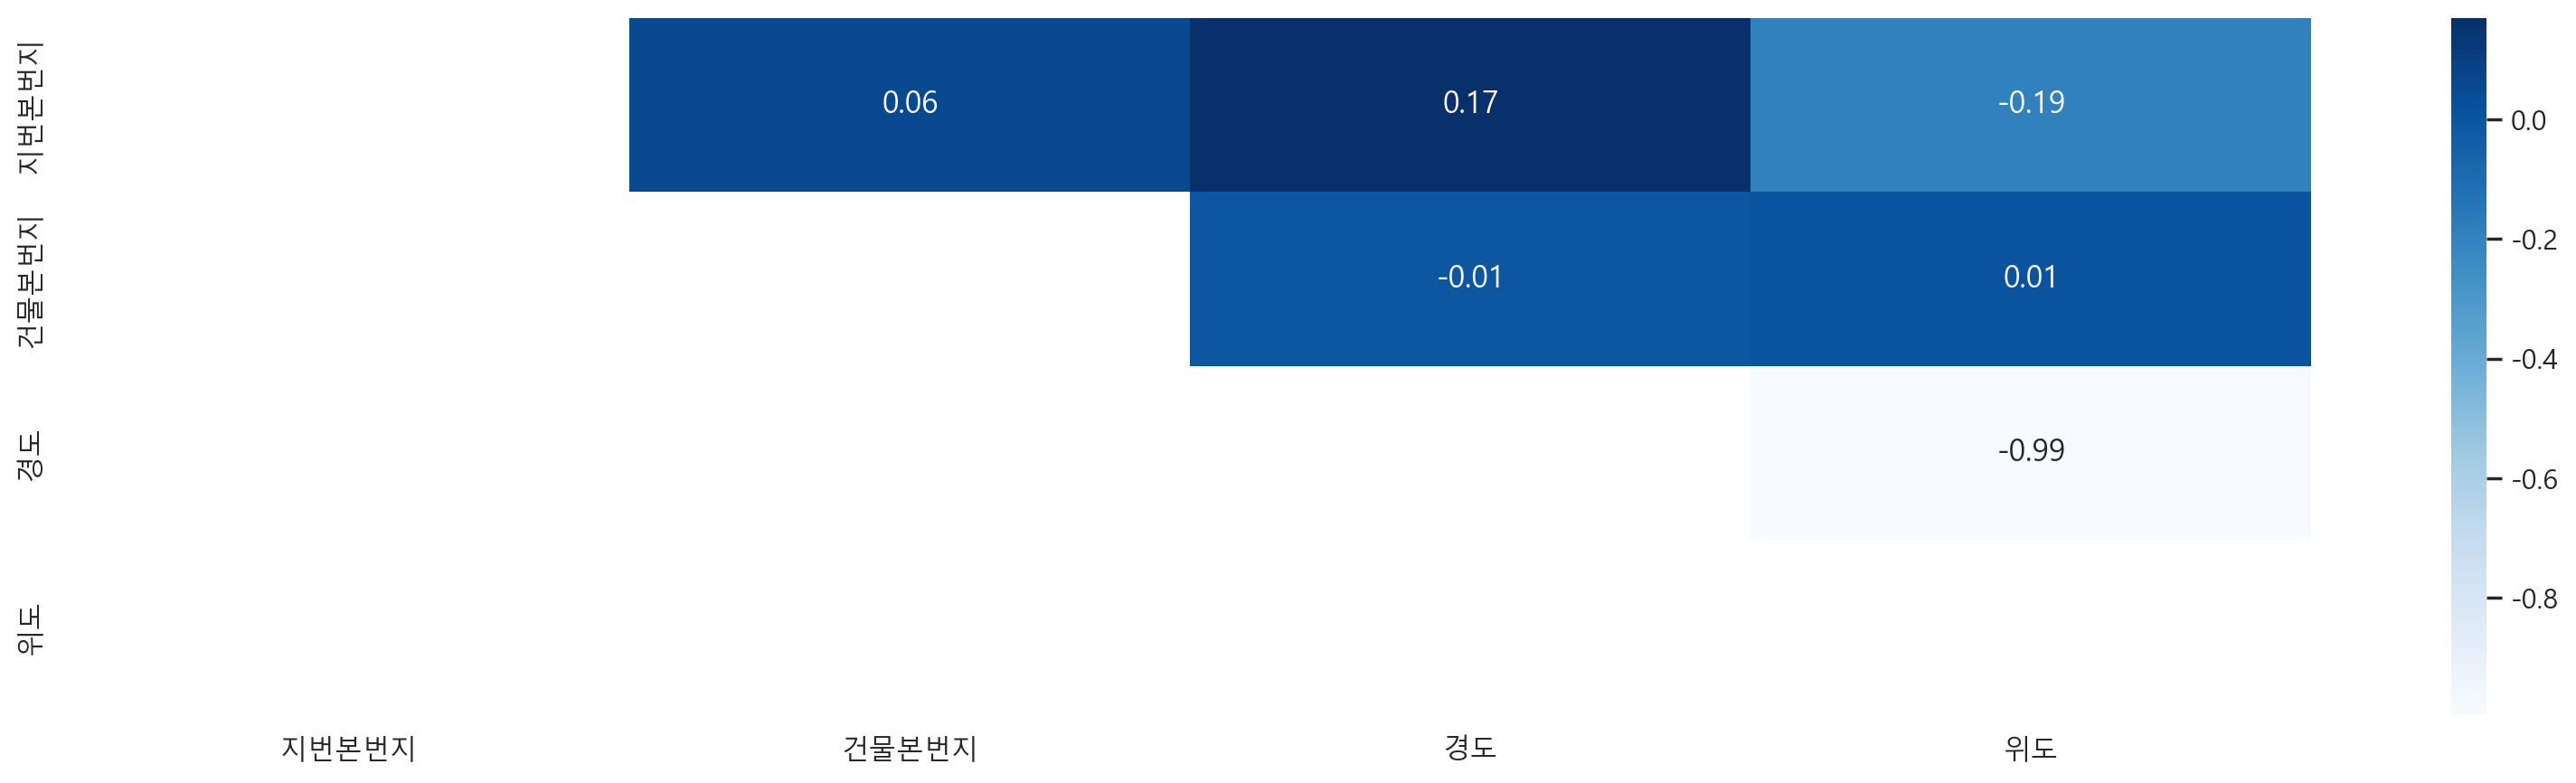

In [322]:
mask=np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',mask=~mask)
plt.show()

# 9. '경도'와 '위도' 컬럼을 이용하여 산점도
- Anscombe’s quartet — seaborn 0.10.0 documentation

## (1)x축에는 경도, y축에는 위도 컬럼을 산점도로 시각화

In [6]:
#그래프 그리기전에 shape확인
df.shape

(696054, 16)

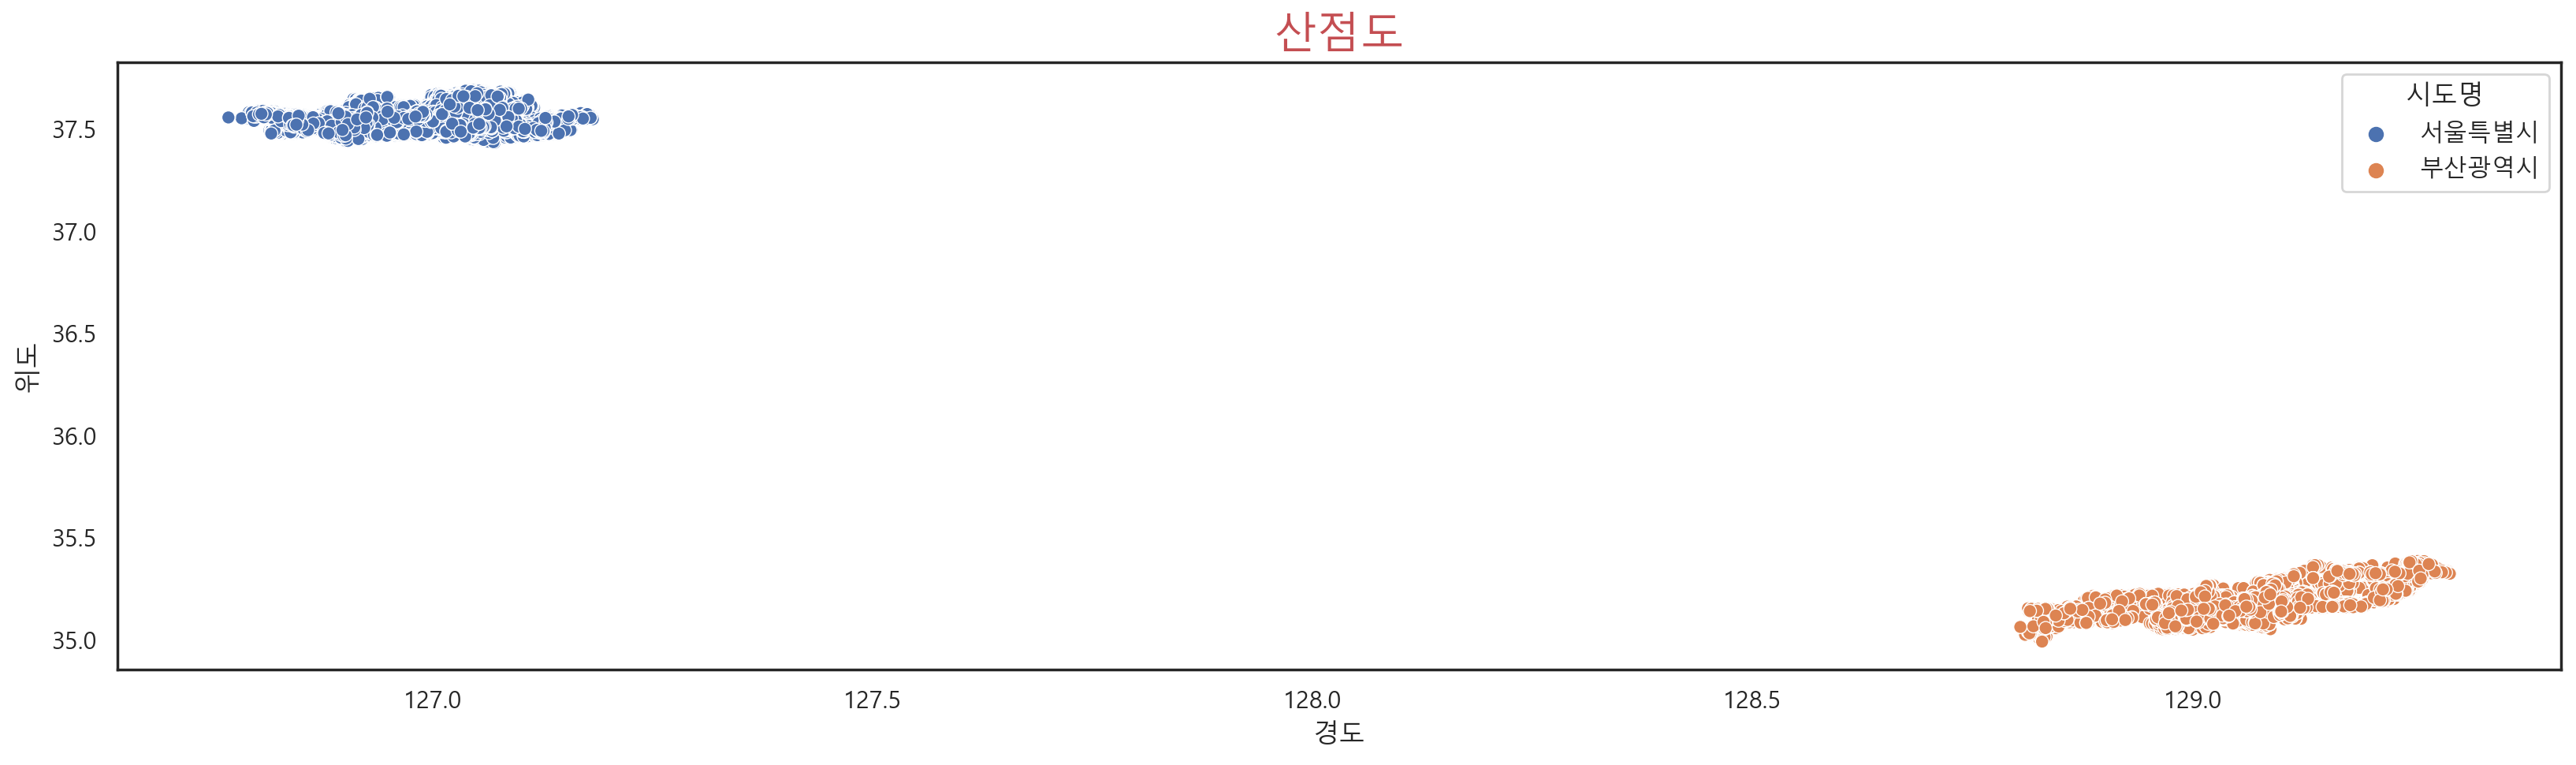

CPU times: total: 21.4 s
Wall time: 21.9 s


In [9]:
%%time
#산점도의 경우 시간이 많이 걸릴수 있어서 sample데이터로 출력
g = sns.scatterplot(data=df, x='경도',y='위도', hue='시도명')
# g.set_tilte('산점도', color='f', fontsize=20)
g.set(title='산점도')
plt.title('산점도', color='r',fontsize=20)
plt.show()

## (2)경도와 위도의 산점도를 '시도명' 컬럼별로 서브플롯으로 시각화

In [10]:
df['시도명'].unique()

array(['서울특별시', '부산광역시'], dtype=object)

In [14]:
# df전체 데이터수
df.shape[0]
len(df)

696054

In [88]:
#원본 데이터의 시도명별 비중
df_sample = df.sample(1)
cnt = df['시도명'].value_counts()
cnt/len(df)*100

서울특별시    77.654464
부산광역시    22.345536
Name: 시도명, dtype: float64

In [90]:
# 단순 샘플링 데이터의 시도명별 비중
df_sample = df.sample(frac=0.1)
cnt = df_sample['시도명'].value_counts()
cnt/len(df_sample)*100

서울특별시    77.734358
부산광역시    22.265642
Name: 시도명, dtype: float64

In [74]:
# 층하 샘플링 데이터의 시도명별 비중
from sklearn.model_selection import train_test_split
# _매개변수에 10% , df_sample에 90%
_, df_sample = train_test_split(df,
                               test_size=0.1,
#                                 train_size=0.9,
                               stratify=df.시도명) #시도명 기준으로 뽑기 
cnt = df_sample['시도명'].value_counts()
cnt/len(df_sample)

서울특별시    0.776542
부산광역시    0.223458
Name: 시도명, dtype: float64

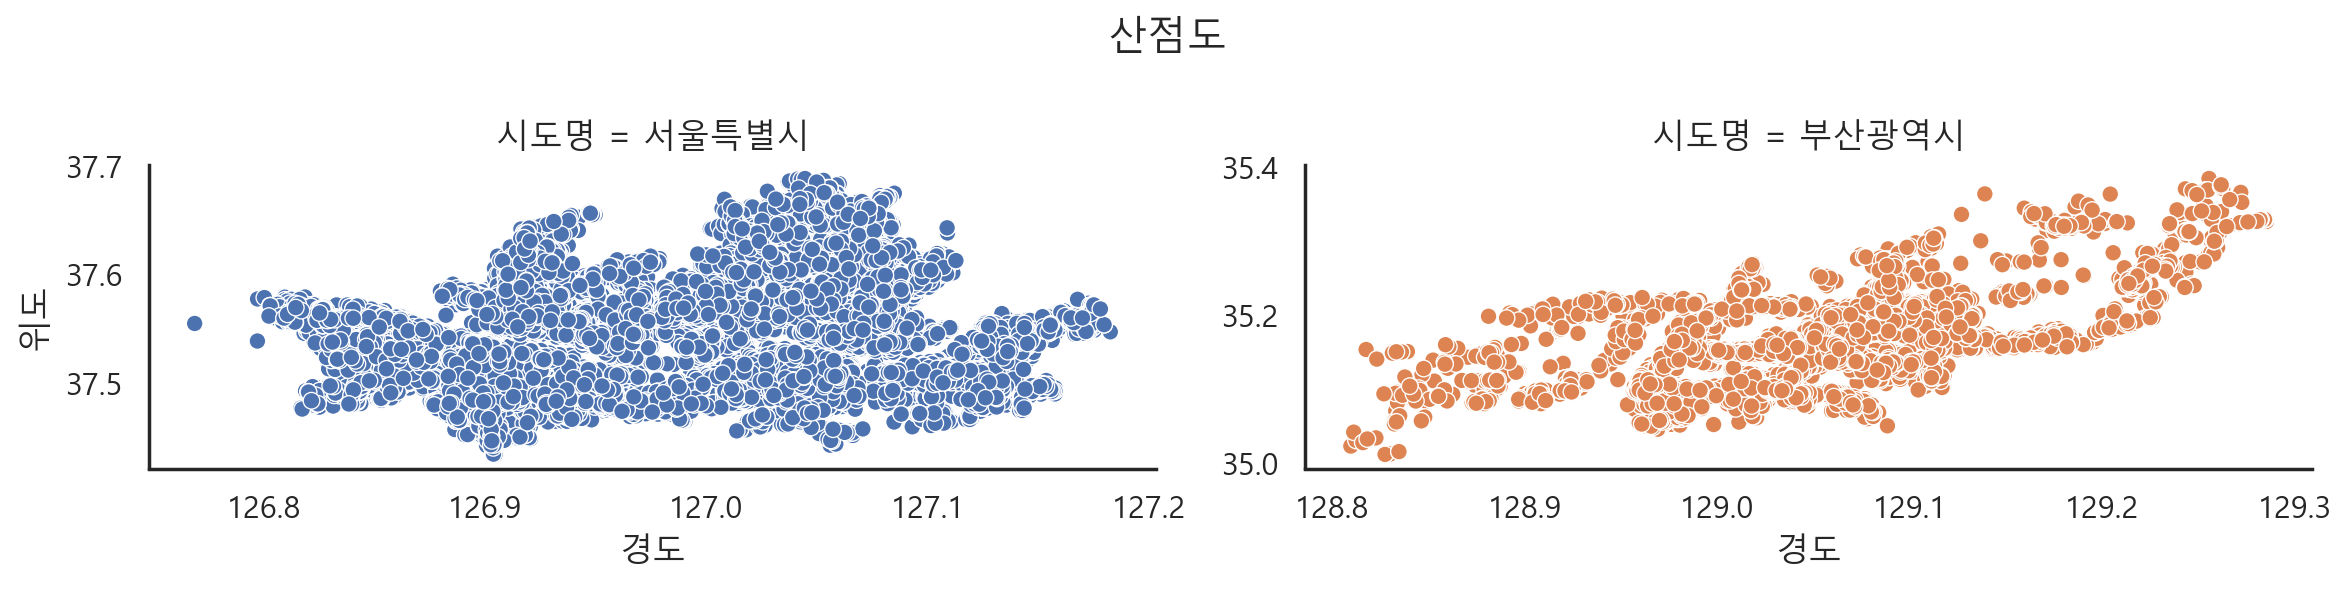

In [62]:
a = sns.relplot(data=df_sample,
           x='경도',
           y='위도',
           hue='시도명',
           col='시도명',                                #서브플롯을 그리는 기준 열
           facet_kws={'sharex':False, 'sharey':False}, #축 공유 
           legend=False,                               #범례 안 보이게
           height=3,                                   #서브플롯 높이 지정
           aspect=2,                                   #높이에 대한 가로 사이즈 비율
           )
# a.fig.set_size_inches(16,8) #서브플롯 사이즈 변경하는 방법 (외부에서)
a.fig.suptitle('산점도')
plt.tight_layout() #여백 거의 없이 겹침 방지하고 다시 레이아웃을 잡음 
plt.show()

## (3)시각화된 산점도를 바탕으로 회귀선을 그림

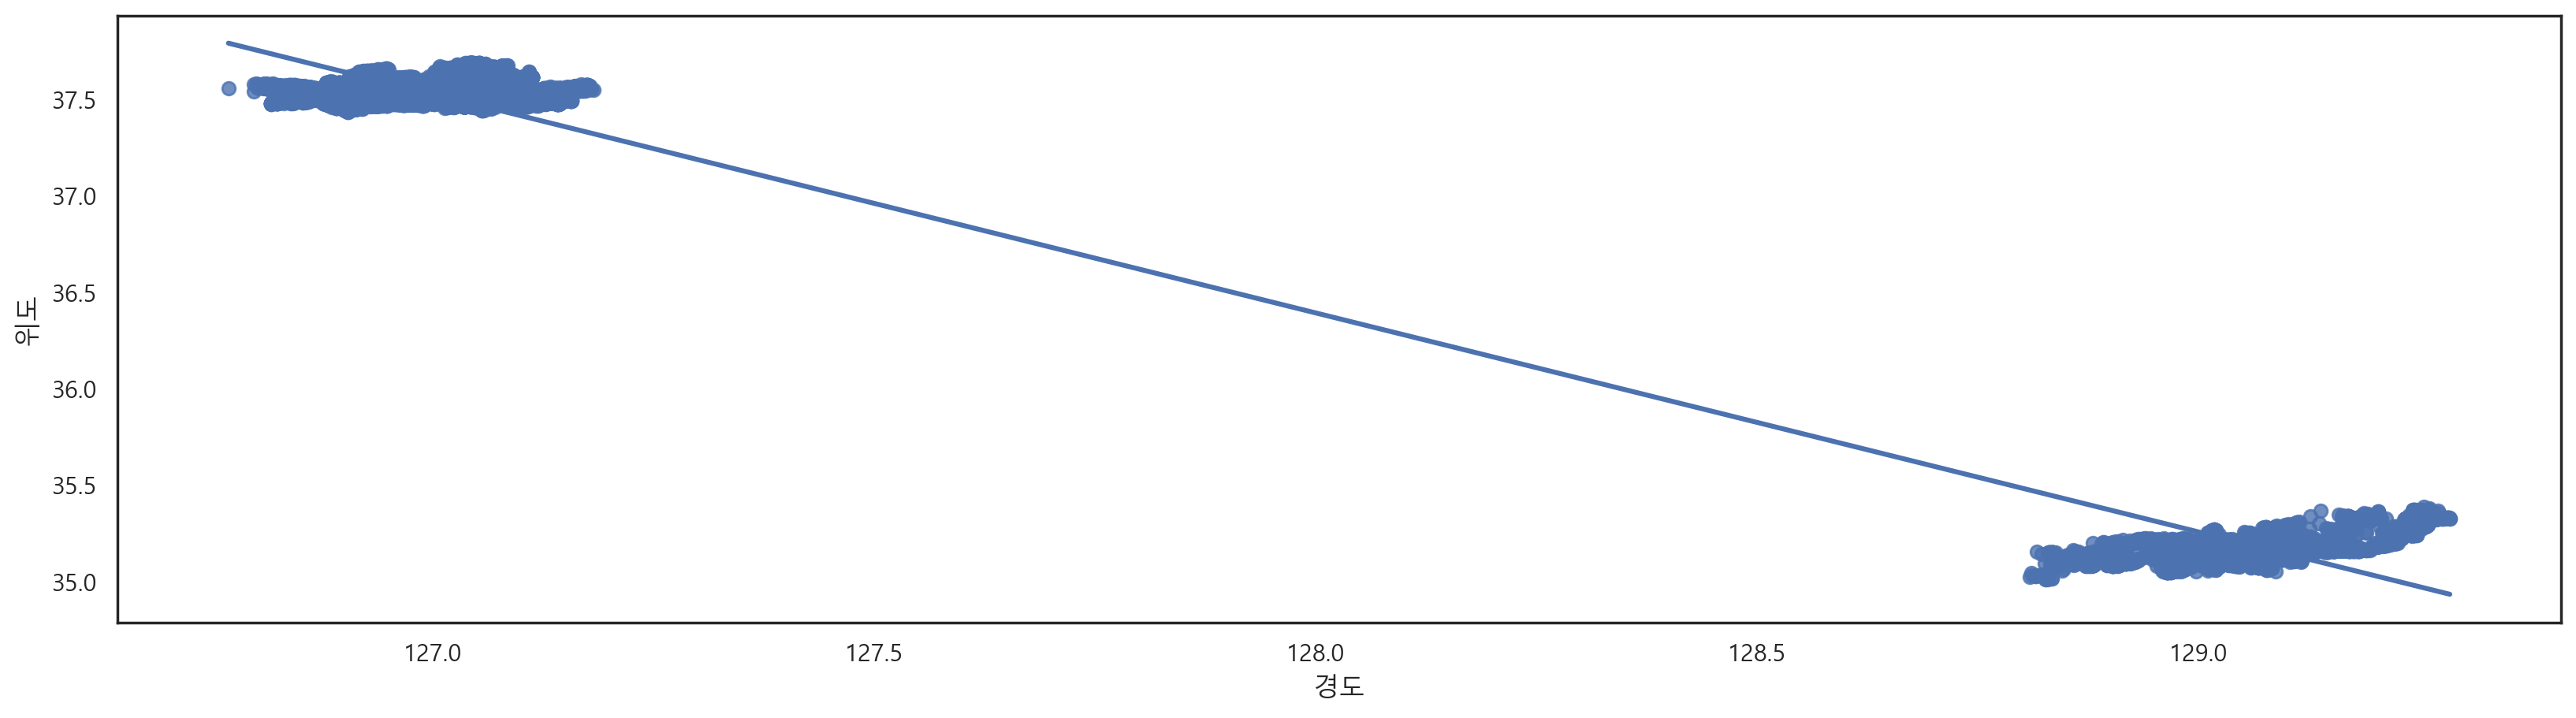

In [64]:
sns.regplot(data=df_sample, x='경도', y='위도')
plt.show()

## (4)시각화된 산점도를 바탕으로 회귀선을 서브플롯으로 그림

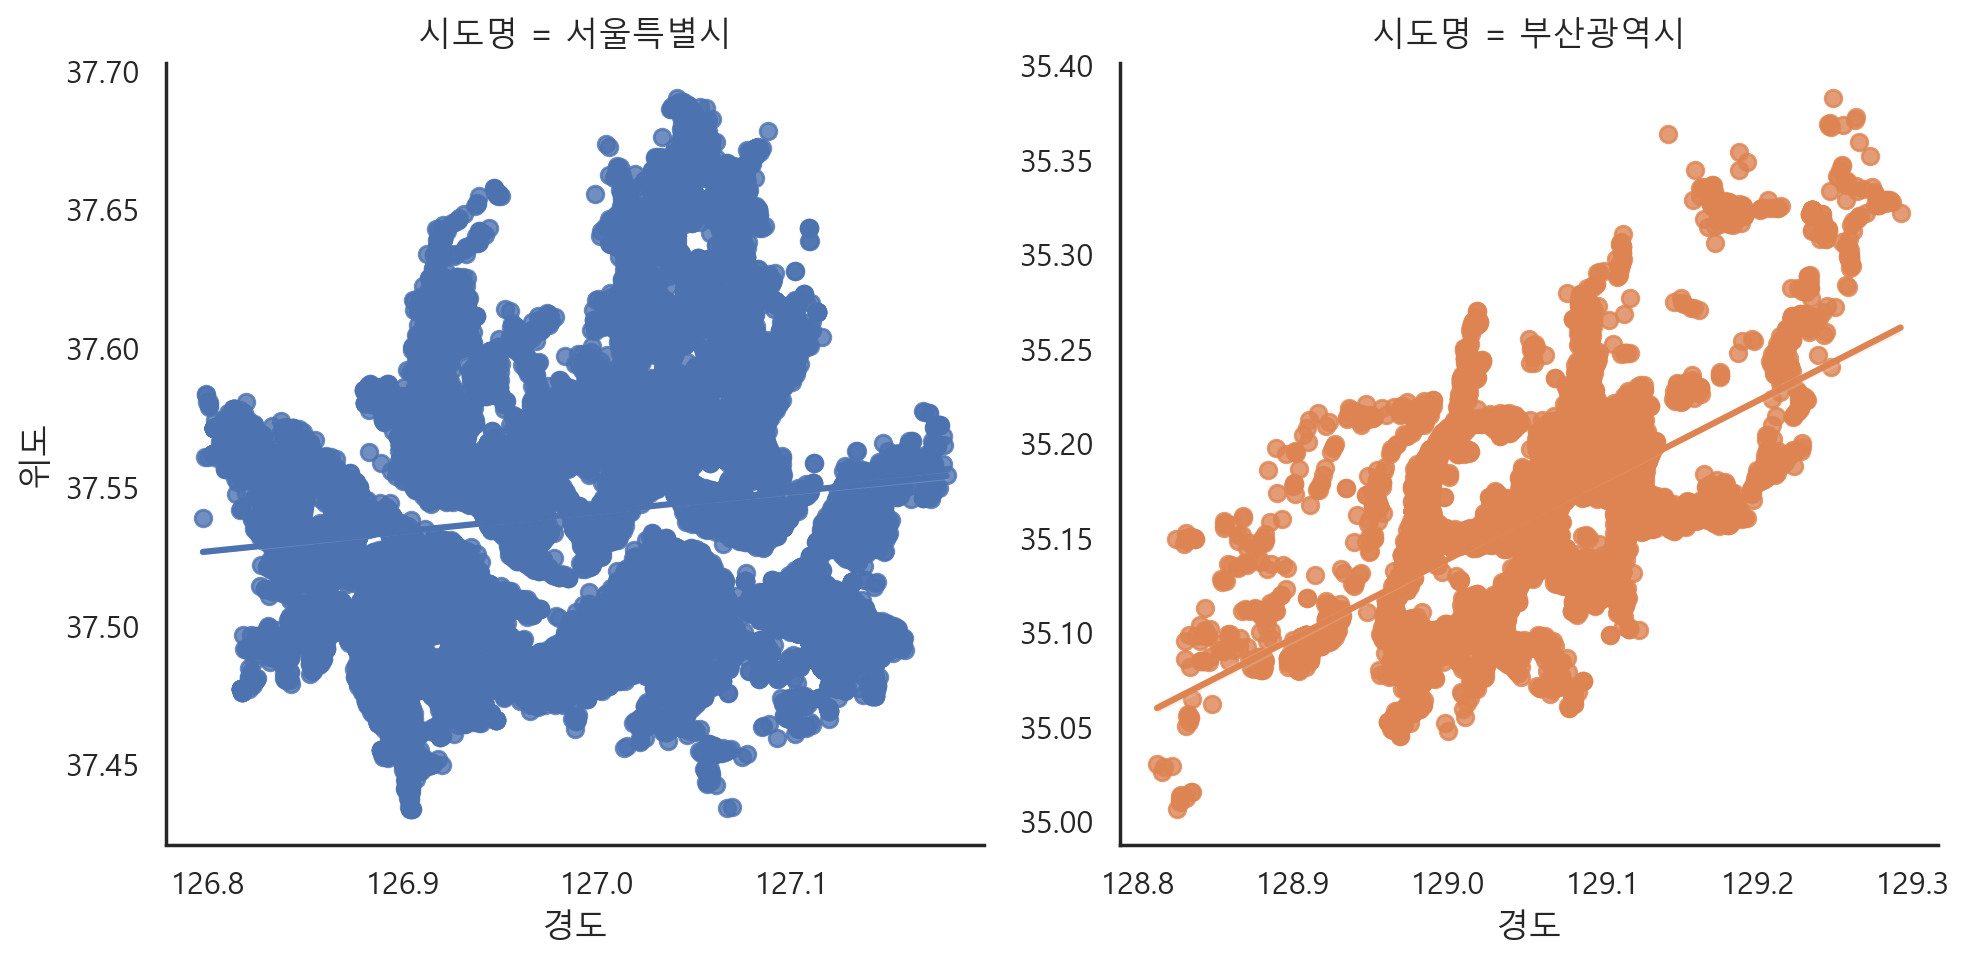

In [91]:
# sns.regplot(data=df_sample, x='경도',y='위도', hue='시도명')  #regplot에는 hue를 사용하지 못함
sns.lmplot(data=df_sample, x='경도', y='위도', 
           hue='시도명',
           col='시도명',
           facet_kws={'sharex':False, 'sharey':False})
plt.show()

# 10. 상권업종대분류명별 상호명의 개수를 도출하고 시각화

In [94]:
df.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지', '도로명주소', '경도', '위도'],
      dtype='object')

In [97]:
df['상권업종대분류명'].value_counts()

음식         193508
소매         151969
과학·기술      107216
수리·개인       71012
교육          52404
부동산         30940
시설관리·임대     30466
예술·스포츠      26408
보건의료        20758
숙박          11373
Name: 상권업종대분류명, dtype: int64

In [98]:
df.isna().sum()

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지       63
지번주소         0
도로명          0
건물본번지        1
도로명주소        0
경도           0
위도           0
dtype: int64

In [101]:
#상호명이 결측치인 행을 찾기 불리언인덱싱을 통해 찾기
df[df['상호명'].isna()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
548763,NaN,소매,섬유·의복·신발 소매,신발 소매업,부산광역시,부산진구,부전2동,부전동,대지,573.0,부산광역시 부산진구 부전동 573-1,부산광역시 부산진구 중앙대로,717.0,부산광역시 부산진구 중앙대로 717,129.059138,35.155237


<Axes: xlabel='상권업종대분류명'>

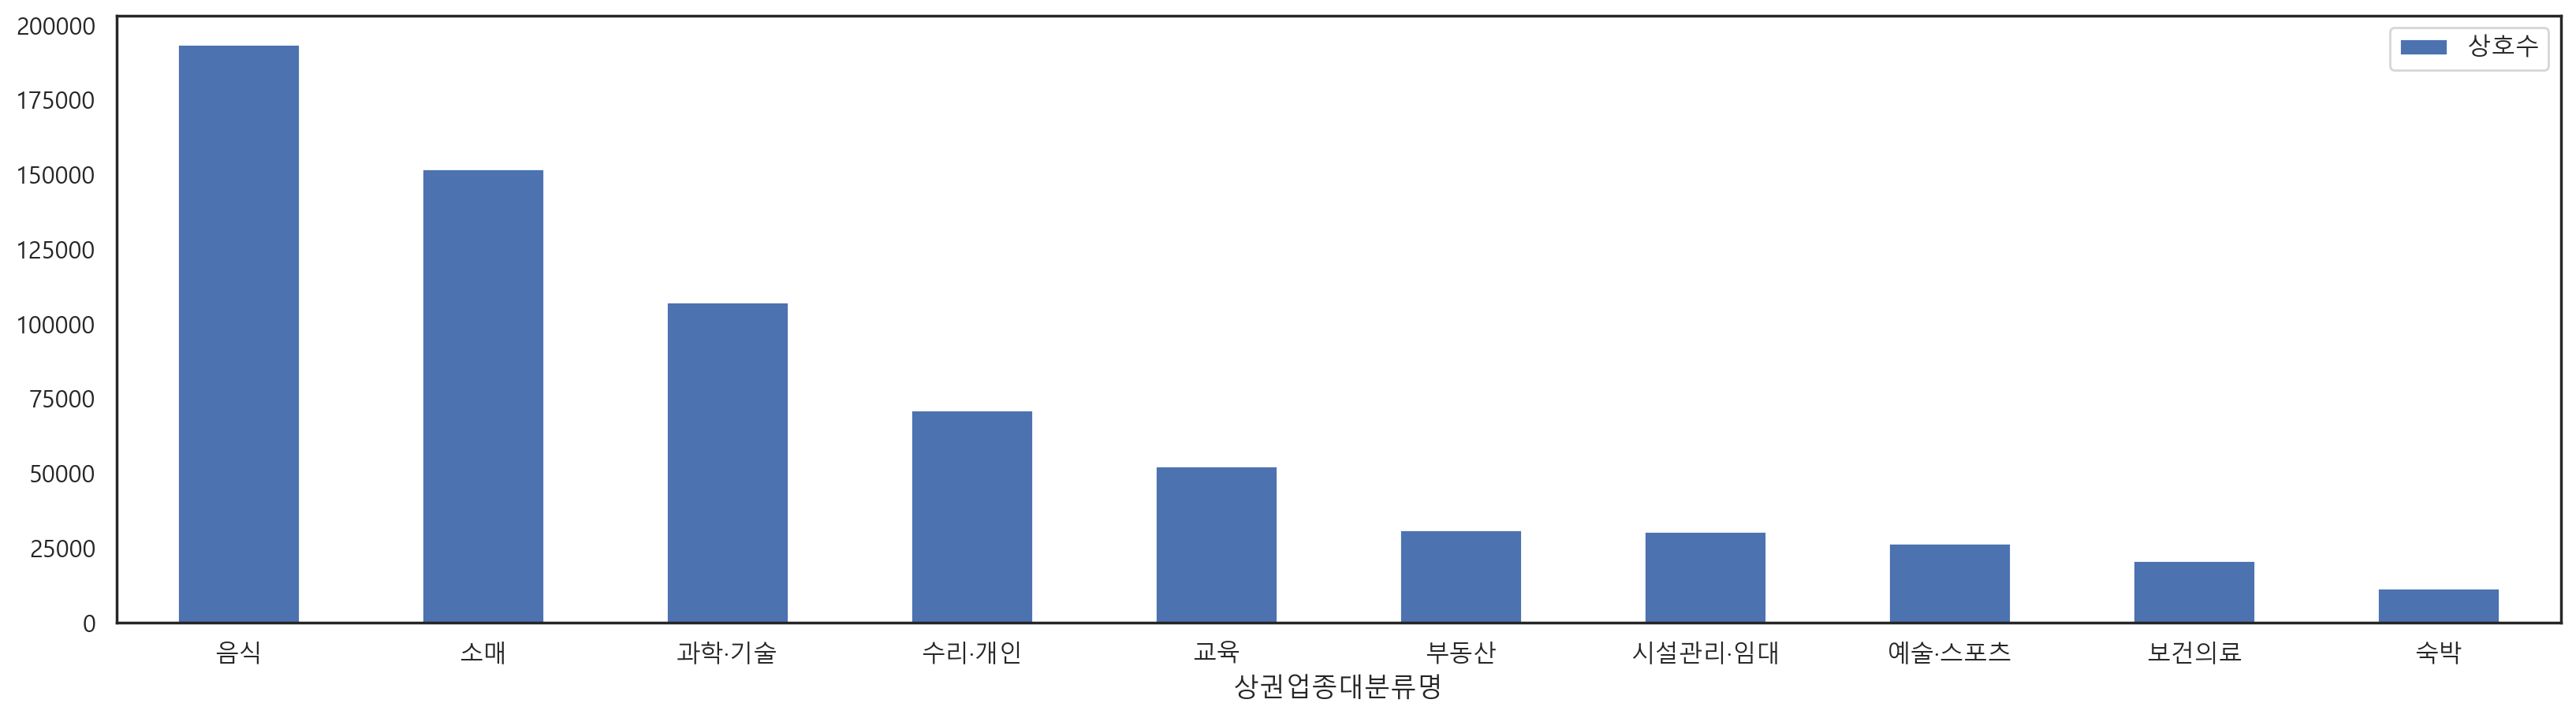

In [122]:
# 상권업종대분류별 상호명수 (결측치 제외된 값)
result = df.pivot_table(index='상권업종대분류명',
               values='상호명',
               aggfunc='count' 
              ).sort_values(by='상호명',ascending=False)
# result.columns = ['상호수']
result.rename(columns={'상호명':'상호수'}, inplace=True) 
# sns.barplot(x=result.index, y=result)
result

result.plot.bar(rot=0)



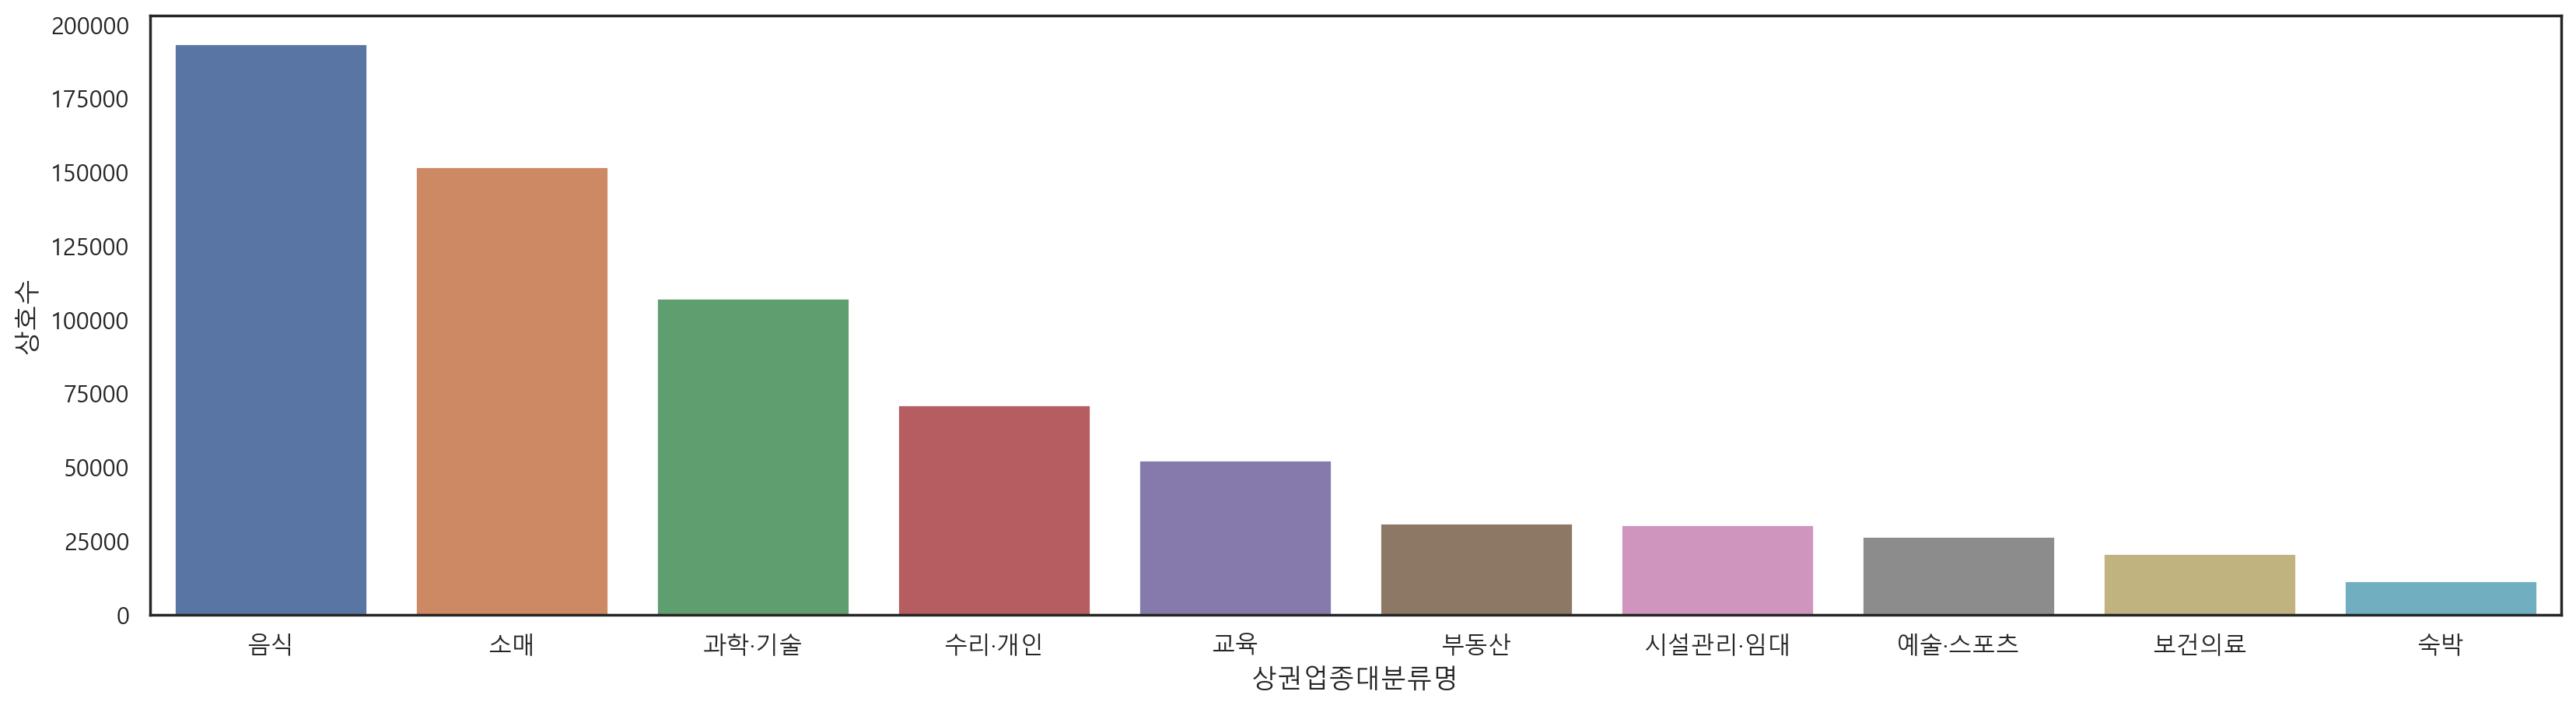

In [130]:
sns.barplot(data=result.reset_index(),
            x='상권업종대분류명',
            y='상호수')
plt.show()
# result.reset_index()

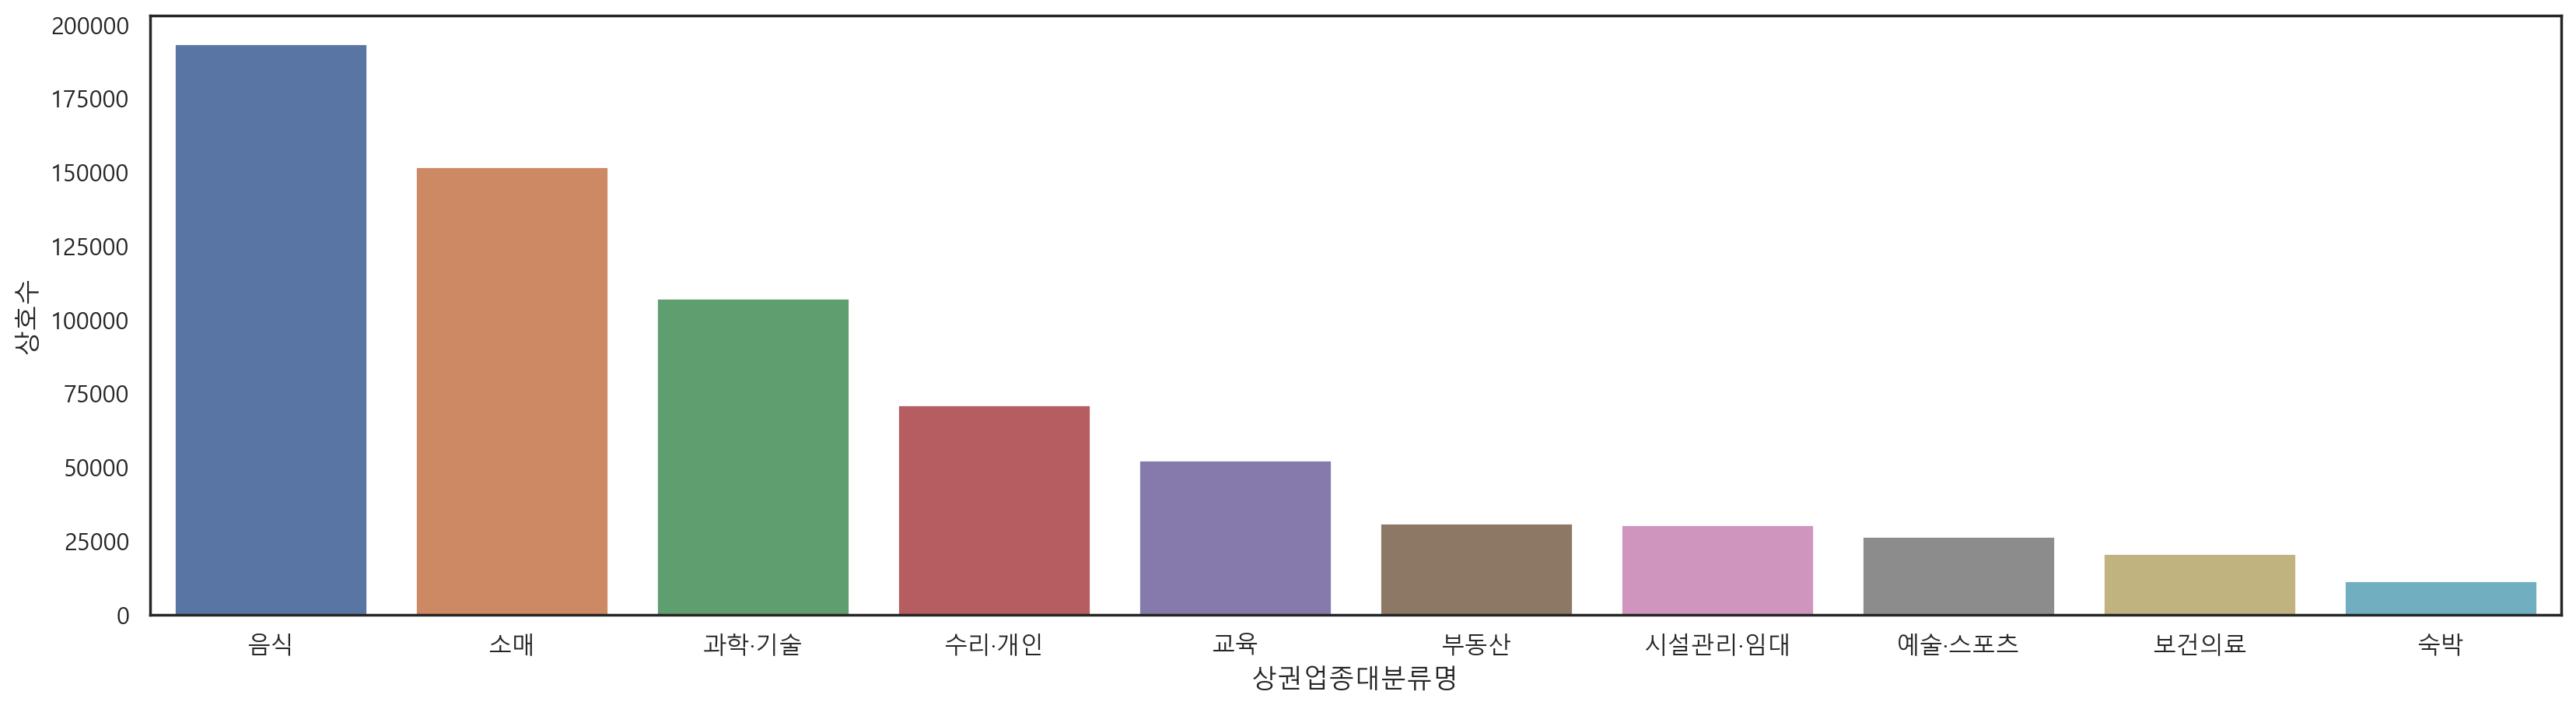

In [131]:
sns.barplot(data=result,
            x=result.index,
            y='상호수')
plt.show()
# result.reset_index()

# 11.상권업종대분류명이 음식인 서브셋을 이용한 분석

In [132]:
df.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지', '도로명주소', '경도', '위도'],
      dtype='object')

In [137]:
group = df.groupby(['상권업종대분류명','상권업종중분류명','상권업종소분류명'])
len(group)
# for grp, val in group:
#     print(grp)

247

## (1) '상권업종대분류명'이 음식인 서브셋을 변수 df_food에 담기

In [146]:
df_food = df[df['상권업종대분류명']=='음식']

 ## (2) 상권업종대분류명'이 음식이면서, '시군구명'이 강남구 데이터만 가져와서 '상권업종중분류명'별로 빈도수를 구함 
 (loc함수를 이용 / loc함수 이용안함)

In [151]:
df_food.groupby('시군구명')['상호명'].count().sort_values(ascending=False)

시군구명
강남구     12608
강서구      9814
마포구      9328
중구       8426
송파구      8289
영등포구     7793
부산진구     6811
서초구      6738
종로구      6641
관악구      5786
해운대구     5316
용산구      5137
강동구      5034
광진구      5023
구로구      4772
동대문구     4758
은평구      4625
성북구      4618
성동구      4595
노원구      4452
중랑구      4261
서대문구     4233
동래구      4164
사하구      4133
동작구      3867
양천구      3856
강북구      3787
금천구      3722
수영구      3601
금정구      3587
남구       3250
연제구      3222
기장군      3198
사상구      3171
북구       3039
도봉구      2841
동구       1866
영도구      1639
서구       1507
Name: 상호명, dtype: int64

In [155]:
# 비추 (loc함수 이용 안함하고 푸는 방식 )
df_food[df_food['시군구명']=='강남구']['상권업종중분류명'].value_counts()

한식         4329
비알코올       2180
기타 간이      2083
주점         1292
서양식        1037
일식          915
중식          445
동남아시아       201
구내식당·뷔페     125
기타 외국         1
Name: 상권업종중분류명, dtype: int64

In [157]:
#loc함수 
df_food.loc[df_food['시군구명']=='강남구','상권업종중분류명'].value_counts()

한식         4329
비알코올       2180
기타 간이      2083
주점         1292
서양식        1037
일식          915
중식          445
동남아시아       201
구내식당·뷔페     125
기타 외국         1
Name: 상권업종중분류명, dtype: int64

In [170]:
#1차원
df_food.loc[df_food['시군구명']=='강남구'].groupby('상권업종중분류명')['상호명'].count().sort_values(ascending=False)

#2차원
# df_kangnam = df_food.loc[df_food['시군구명']=='강남구']
# df_kangnam.groupby('상권업종중분류명')[['상호명']].count().sort_values('상호명' ,ascending=False)
# df_food.loc[df_food['시군구명']=='강남구'].groupby('상권업종중분류명', as_index=False)['상호명'].count().sort_values(by='상호명' , ascending=False)
# df_food.loc[df_food['시군구명']=='강남구'].groupby('상권업종중분류명')[['상호명']].count().sort_values(by='상호명' , ascending=False)

# df_kangnam.groupby('상권업종중분류명',
#                   as_index=False)['상호명'].count().sort_valueses(by='상호명',
#                                                               ascending=False)

df_kangnam.pivot_table(index='상권업종중분류명',
                      values='상호명',
                      aggfunc='count').sort_values(by='상호명',ascending=False)

,상호명
상권업종중분류명,
한식,4329
비알코올,2180
기타 간이,2083
주점,1292
서양식,1037
일식,915
중식,445
동남아시아,201
구내식당·뷔페,125


# 12.	df 데이터셋에서 “상권업종대분류명”이 음식인 데이터 중 서울특별시 데이터 서브셋
https://seaborn.pydata.org/tutorial/categorical.html : 범주형그래프


# ★★★★★★★★★★

## (1)	“상권업종대분류명”이 음식인 서브셋 중 서울특별시 데이터만 변수 df_seoul_food에 할당하고 확인

In [ ]:
df[(df['상권업종대분류명']=='음식') & (df['시도명']=='서울특별시')]

In [182]:
df[(df['상권업종대분류명']=='음식') & (df['시군구명']=='서울시')]

(139929, 16)

In [183]:
df_seoul_food = df[(df['상권업종대분류명']=='음식') & (df['시도명']=='서울특별시')]
df_seoul_food.shape

(139929, 16)

In [179]:
df_seoul_food.groupby(['시군구명','상권업종중분류명'])['상호명'].count()

Series([], Name: 상호명, dtype: int64)

## (2)df_seoul_food 데이터 셋을 시군구명, 상권업종중분류명으로 그룹화하여 상점수를 count한 내용을 food_gu 변수에 할당. 

In [184]:
food_gu = df_seoul_food.groupby(['시군구명', '상권업종중분류명'])['상호명'].count()
# food_gu = df_seoul_food.pivot_table(index=['시군구명', '상권업종중분류명'],
#                                    values='상호명',
#                                    aggfunc='count')
food_gu

시군구명  상권업종중분류명
강남구   구내식당·뷔페      125
      기타 간이       2083
      기타 외국          1
      동남아시아        201
      비알코올        2180
                  ... 
중랑구   서양식           87
      일식           140
      주점           632
      중식           113
      한식          1804
Name: 상호명, Length: 240, dtype: int64

## (3)food_gu 변수를 다음과 같은 스타일의 표로 출력(food_gu 이용).

In [186]:
food_gu.unstack()

상권업종중분류명,구내식당·뷔페,기타 간이,기타 외국,동남아시아,비알코올,서양식,일식,주점,중식,한식
시군구명,,,,,,,,,,
강남구,125.0,2083.0,1.0,201.0,2180.0,1037.0,915.0,1292.0,445.0,4329.0
강동구,36.0,1176.0,1.0,61.0,750.0,145.0,225.0,642.0,162.0,1836.0
강북구,20.0,758.0,NaN,23.0,493.0,104.0,115.0,602.0,109.0,1563.0
강서구,66.0,1584.0,3.0,74.0,1067.0,207.0,329.0,921.0,262.0,2528.0
관악구,20.0,1224.0,1.0,52.0,795.0,199.0,257.0,934.0,234.0,2070.0
광진구,28.0,1025.0,NaN,57.0,809.0,187.0,248.0,677.0,235.0,1757.0
구로구,39.0,991.0,4.0,46.0,658.0,92.0,170.0,635.0,336.0,1801.0
금천구,61.0,764.0,5.0,40.0,579.0,66.0,129.0,459.0,211.0,1408.0
노원구,34.0,1136.0,NaN,40.0,691.0,155.0,201.0,465.0,163.0,1567.0


## (4)위 3번 스타일의 표를 pivot_table함수를 이용하여 출력

In [188]:
# unstack과 동일한 값 출력
df_seoul_food.pivot_table(index='시군구명',
                         columns='상권업종중분류명',
                         values='상호명',
                         aggfunc='count')

상권업종중분류명,구내식당·뷔페,기타 간이,기타 외국,동남아시아,비알코올,서양식,일식,주점,중식,한식
시군구명,,,,,,,,,,
강남구,125.0,2083.0,1.0,201.0,2180.0,1037.0,915.0,1292.0,445.0,4329.0
강동구,36.0,1176.0,1.0,61.0,750.0,145.0,225.0,642.0,162.0,1836.0
강북구,20.0,758.0,NaN,23.0,493.0,104.0,115.0,602.0,109.0,1563.0
강서구,66.0,1584.0,3.0,74.0,1067.0,207.0,329.0,921.0,262.0,2528.0
관악구,20.0,1224.0,1.0,52.0,795.0,199.0,257.0,934.0,234.0,2070.0
광진구,28.0,1025.0,NaN,57.0,809.0,187.0,248.0,677.0,235.0,1757.0
구로구,39.0,991.0,4.0,46.0,658.0,92.0,170.0,635.0,336.0,1801.0
금천구,61.0,764.0,5.0,40.0,579.0,66.0,129.0,459.0,211.0,1408.0
노원구,34.0,1136.0,NaN,40.0,691.0,155.0,201.0,465.0,163.0,1567.0


## (5)	3번의 결과 중 강남구 데이터만 뽑아 barplot으로 시각화(판다스 plot이용)

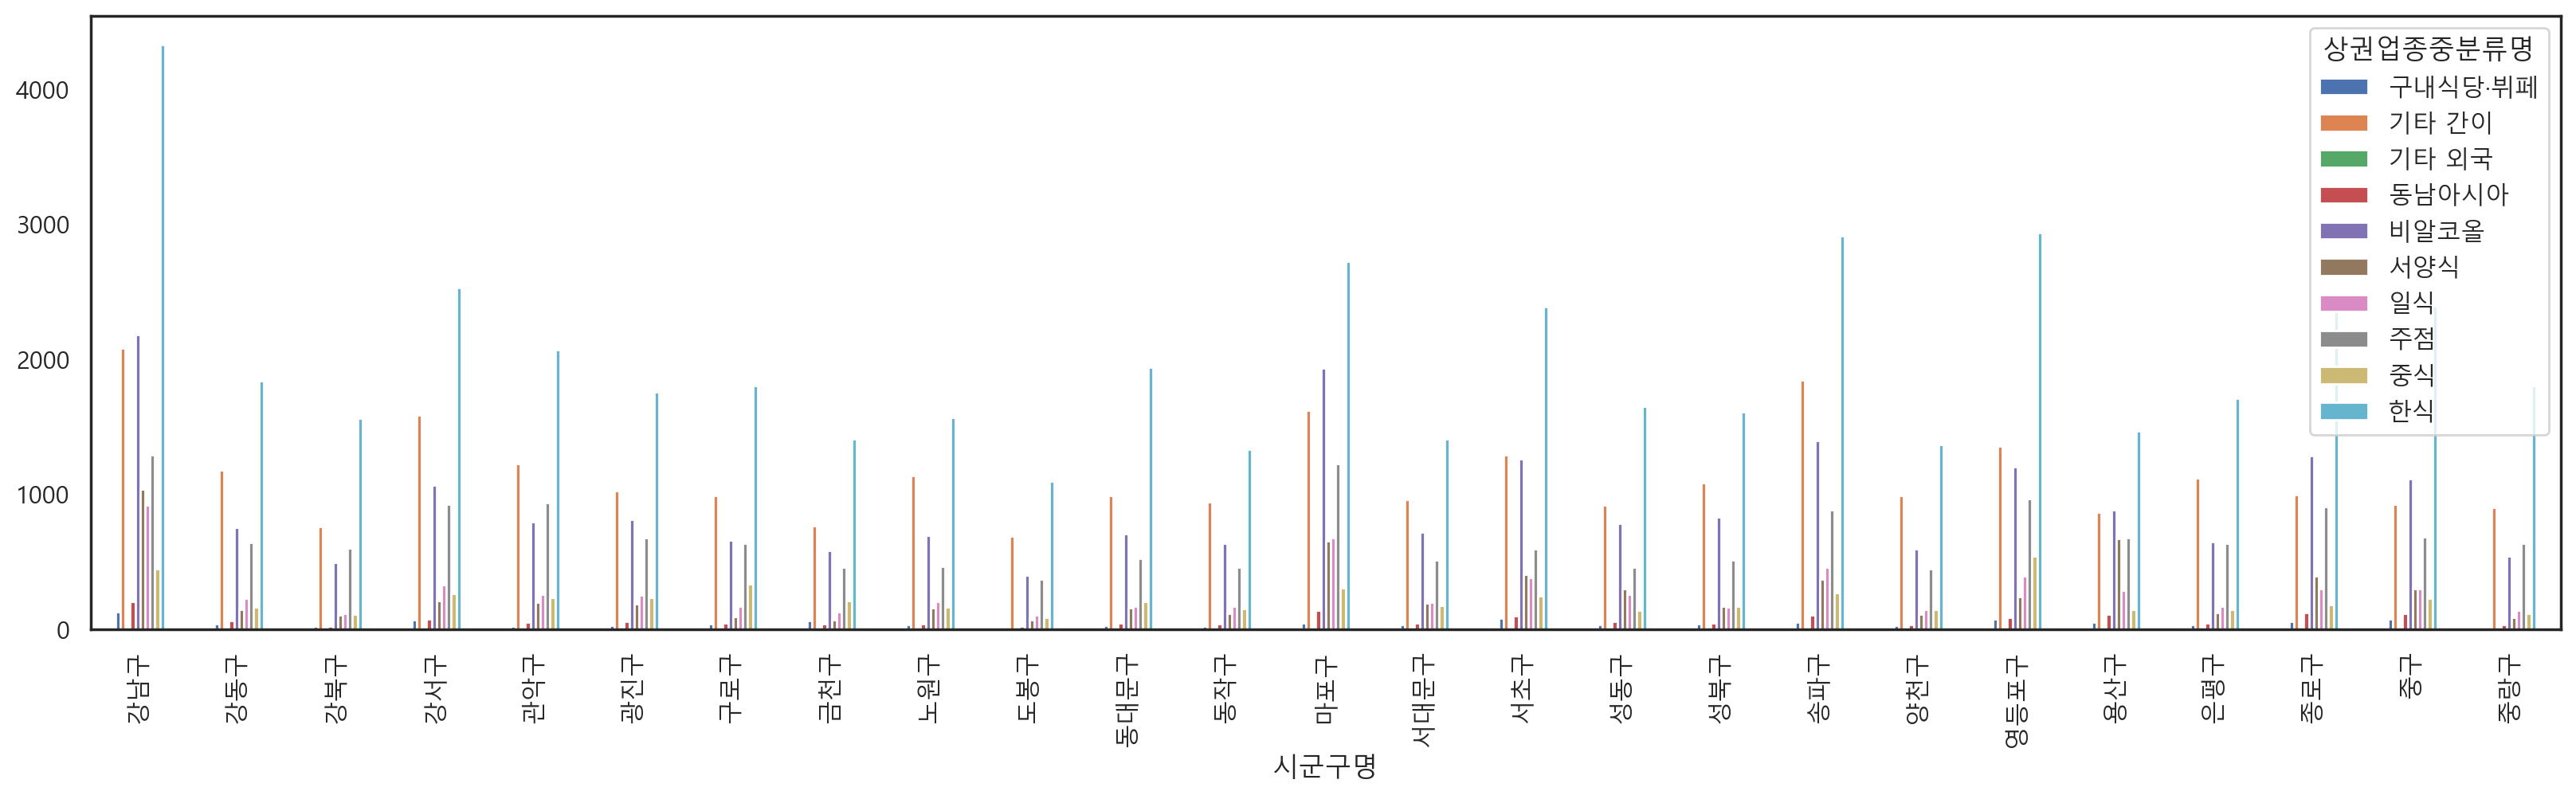

In [193]:
# 이건 모든 구별 중불루별로 bar차트만 나옴. 강남구만 아님 
food_gu.unstack().plot.bar(figsize=(20,5))
plt.show()

In [28]:
# food_gu['강남구'].sort_values().plot.bar(rot=0)
# plt.show()

## (6)	3번 food_gu를 seaborn을 이용하여 구별 음식점 상호 개수를 시각화

In [213]:
food_gu_resetidx = food_gu.reset_index()
food_gu_resetidx.head()

,시군구명,상권업종중분류명,상호명
0,강남구,구내식당·뷔페,125
1,강남구,기타 간이,2083
2,강남구,기타 외국,1
3,강남구,동남아시아,201
4,강남구,비알코올,2180


In [217]:
food_gu_resetidx.rename(columns={'상호명':'상호수'}, inplace=True)
food_gu_resetidx

,시군구명,상권업종중분류명,상호수
0,강남구,구내식당·뷔페,125
1,강남구,기타 간이,2083
2,강남구,기타 외국,1
3,강남구,동남아시아,201
4,강남구,비알코올,2180
...,...,...,...
235,중랑구,서양식,87
236,중랑구,일식,140
237,중랑구,주점,632
238,중랑구,중식,113


In [27]:
# sns.barplot(data=food_gu_resetidx,
#             x='시군구명',
#             y='상호수', 
#             errorbar=None,
#             estimator='sum')
# plt.show()
# # result.reset_index()


In [274]:
food_gu_resetidx.groupby('시군구명')['상호수'].sum().sort_values(ascending=False).index

Index(['강남구', '마포구', '송파구', '영등포구', '강서구', '서초구', '종로구', '중구', '관악구', '용산구',
       '강동구', '광진구', '구로구', '동대문구', '은평구', '성북구', '성동구', '노원구', '중랑구', '서대문구',
       '동작구', '양천구', '강북구', '금천구', '도봉구'],
      dtype='object', name='시군구명')

# ★★★★★★★★★

In [26]:
# #정렬된 도표
# sns.barplot(data=food_gu_resetidx,
#             x='시군구명',
#             y='상호수', 
#             errorbar=None,
#             estimator='sum',
#             order=food_gu_resetidx.groupby('시군구명')['상호수'].sum().sort_values(ascending=False).index)
# #글씨 넣기 
# plt.txet()

# plt.show()

## (7)상권업종중분류명별 음식점 상호갯수

In [25]:
# sns.barplot(data=food_gu_resetidx,
#            x='상권업종중분류명',
#            y='상호수',
#            estimator=np.median)

## (8)Seaborn의 catplot을 이용하여 상권업종중분류별 음식점을 구별로 상권업종중분류명별 bar차트를 서브플롯으로 시각화

In [23]:
# sns.catplot(data=food_gu_resetidx,
#            x='상권업종중분류명', y='상호수',
#            kind='bar', 
#            col='시군구명',
#            palette='Set2', # color map
#            col_wrap=2, # 한줄에 그려질 서브플롯수
#            height=3,   # 높이
#            aspect=3,   # 높이 대비 가로 비율
#            sharex=False, sharey=False) # 축공유 여부
# plt.show()

In [24]:
# # 상권업종중분류별 음식점을 구별, 상권업종중분류명별 bar차트 
# sns.catplot(data=food_gu_resetidx,
#            x='상권업종중분류명',
#            y='상호수',
#            kind='bar',
#            col='시군구명', 
#            col_wrap=2,  #한줄에 그려질 서브플롯수
#            palette='Set2', 
#            height=3, #높이
#            aspect=3, #높이 대비 가로 비율
#            sharex=False,
#            sharey=False)
# plt.show()

## (9) seaborn의 catplot을 이용하여 구별 음식점을 상권업종중분류명별로 서브플롯으로 시각화

In [22]:
# sns.catplot(data=food_gu_resetidx,
#            x='시군구명',y='상호수',
#            kind='bar',col='상권업종중분류명',
#            col_wrap=1,
#            sharex=False, sharey=False,
#            height=3, aspect=8)

# plt.show()

In [21]:
# sns.catplot(data=food_gu_resetidx.sort_values(by='상호수',ascending=False),
#            x='시군구명',y='상호수',
#            kind='bar',col='상권업종중분류명',
#            col_wrap=1,
#            sharex=False, sharey=False,
#            height=3, aspect=8)

# plt.show()

In [269]:
food_gu_resetidx.sort_values(by='상호수',ascending=False)

,시군구명,상권업종중분류명,상호수
9,강남구,한식,4329
191,영등포구,한식,2934
171,송파구,한식,2913
123,마포구,한식,2725
38,강서구,한식,2528
...,...,...,...
174,양천구,기타 외국,1
2,강남구,기타 외국,1
12,강동구,기타 외국,1
41,관악구,기타 외국,1


# 13. 구별로 학원수 비교 : 서울 대치동이나 목동에 사교육이 발달되었다는 가설을 뒷받침할수 있는 분석

## (1)서울시 교육(상권업종대분류명 이용) 데이터를 df_academy 변수에 할당하고 확인

In [298]:
df['상권업종대분류명'].unique()

array(['음식', '부동산', '소매', '수리·개인', '과학·기술', '예술·스포츠', '시설관리·임대', '교육',
       '숙박', '보건의료'], dtype=object)

In [306]:
df_academy = df[(df['상권업종대분류명']=='교육') & (df['시도명']=='서울특별시')]
df_academy.shape

(44627, 16)

## (2)df_academy 데이터 셋을 상호명별로 빈도수 출력(value_counts()함수 이용하거나 groupby이용)

In [312]:
df_academy

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
103,백장미댄스,교육,기타 교육,레크리에이션 교육기관,서울특별시,도봉구,창4동,창동,대지,5.0,서울특별시 도봉구 창동 5-1,서울특별시 도봉구 마들로11가길,16.0,서울특별시 도봉구 마들로11가길 16,127.048966,37.652563
143,현대라이프레이키인,교육,교육 지원,기타 교육지원 서비스업,서울특별시,종로구,사직동,신문로1가,대지,58.0,서울특별시 종로구 신문로1가 58-14,서울특별시 종로구 새문안로3길,7.0,서울특별시 종로구 새문안로3길 7,126.972323,37.570931
209,놀자학교,교육,기타 교육,레크리에이션 교육기관,서울특별시,도봉구,쌍문1동,쌍문동,대지,309.0,서울특별시 도봉구 쌍문동 309-5,서울특별시 도봉구 노해로41가길,15.0,서울특별시 도봉구 노해로41가길 15,127.026890,37.650093
222,국선도수유수련원,교육,기타 교육,태권도/무술학원,서울특별시,강북구,수유1동,수유동,대지,468.0,서울특별시 강북구 수유동 468-235,서울특별시 강북구 인수봉로32길,25.0,서울특별시 강북구 인수봉로32길 25,127.015192,37.630723
250,세린유학원,교육,교육 지원,기타 교육지원 서비스업,서울특별시,강남구,대치4동,대치동,대지,889.0,서울특별시 강남구 대치동 889-47,서울특별시 강남구 선릉로90길,10.0,서울특별시 강남구 선릉로90길 10,127.050226,37.503872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540465,잉글리쉬무무내발산어학원,교육,일반 교육,입시·교과학원,서울특별시,강서구,우장산동,내발산동,대지,666.0,서울특별시 강서구 내발산동 666,서울특별시 강서구 강서로,328.0,서울특별시 강서구 강서로 328,126.837348,37.554947
540466,잉글리쉬무무내발산학원,교육,일반 교육,입시·교과학원,서울특별시,강서구,우장산동,내발산동,대지,677.0,서울특별시 강서구 내발산동 677-4,서울특별시 강서구 강서로,316.0,서울특별시 강서구 강서로 316,126.836978,37.553748
540474,시그마에듀,교육,교육 지원,교육컨설팅업,서울특별시,강남구,대치4동,대치동,대지,890.0,서울특별시 강남구 대치동 890-60,서울특별시 강남구 테헤란로70길,12.0,서울특별시 강남구 테헤란로70길 12,127.053155,37.504744
540497,곰돌앤곰돌피아노스튜디오,교육,기타 교육,음악학원,서울특별시,관악구,인헌동,봉천동,대지,1641.0,서울특별시 관악구 봉천동 1641-39,서울특별시 관악구 인헌9길,13.0,서울특별시 관악구 인헌9길 13,126.967476,37.472874


In [290]:
df_academy['상호명'].value_counts().to_frame()

,상호명
입시·교과학원,337
음악학원,20
한우리독서토론논술,15
예리엘잉글리쉬,14
모던필라테스,14
...,...
쭈야공간,1
빌리프필라테스,1
시티테니스,1
휴먼파크역량개발평가원,1


In [321]:
df_academy.groupby('상호명')['위도'].count().sort_values(ascending=False)

상호명
입시·교과학원              337
음악학원                  20
한우리독서토론논술             15
예리엘잉글리쉬               14
개인과외                  14
                    ... 
비에스입시컨설팅진학상담지도교습소      1
비에스티                   1
비에이발레학원                1
비에이블펜싱클럽               1
［주］세일캠퍼스               1
Name: 위도, Length: 41310, dtype: int64

## (3) df_academy 데이터 셋을 상호명별로 빈도수 상위 10개 출력

In [311]:
df_academy['상호명'].value_counts().head(10)

입시·교과학원      337
음악학원          20
한우리독서토론논술     15
예리엘잉글리쉬       14
모던필라테스        14
개인과외          14
아메리카요가        13
더블유에스복싱클럽     11
외국어학원         11
용인대태권도        10
Name: 상호명, dtype: int64

In [322]:
df_academy.groupby('상호명')['위도'].count().sort_values(ascending=False).head(10)

상호명
입시·교과학원      337
음악학원          20
한우리독서토론논술     15
예리엘잉글리쉬       14
개인과외          14
모던필라테스        14
아메리카요가        13
더블유에스복싱클럽     11
외국어학원         11
용인대태권도        10
Name: 위도, dtype: int64

In [326]:
df_academy['상호명'].value_counts().iloc[:10]

입시·교과학원      337
음악학원          20
한우리독서토론논술     15
예리엘잉글리쉬       14
모던필라테스        14
개인과외          14
아메리카요가        13
더블유에스복싱클럽     11
외국어학원         11
용인대태권도        10
Name: 상호명, dtype: int64

## (4)	df_academy 데이터 셋을 시군구명 별로 빈도수 출력(학원이 가장 많은 구부터 출력)

In [327]:
df_academy['시군구명'].value_counts()

강남구     6191
서초구     3808
송파구     3116
마포구     2611
양천구     2398
강서구     2263
노원구     1983
강동구     1943
영등포구    1794
성북구     1582
은평구     1573
관악구     1563
광진구     1391
서대문구    1328
동작구     1324
구로구     1298
동대문구    1196
성동구     1187
종로구     1090
중랑구      975
도봉구      935
용산구      878
금천구      815
강북구      804
중구       581
Name: 시군구명, dtype: int64

In [20]:
# df_academy['시군구명'].value_counts().plot.bar(rot=0)

In [19]:
# result = df_academy['시군구명'].value_counts()
# sns.barplot(x=result.index, y=result, palette='Set2')

## (5)df_academy 데이터 셋에서 어떤 종류의 학원들이 많은지 상위 10개만 academy_count변수에 할당하고 출력
(상권업종소분류명 컬럼 이용)

In [346]:
df_academy['상권업종소분류명'].nunique() #상권업종소분류명 데이터 종류수

18

In [341]:
df_academy['상권업종소분류명'].unique() #상권업종소분류명 데이터 종류

array(['레크리에이션 교육기관', '기타 교육지원 서비스업', '태권도/무술학원', '요가/필라테스 학원', '직원 훈련기관',
       '사회교육시설', '입시·교과학원', '기타 기술/직업 훈련학원', '교육컨설팅업', '컴퓨터 학원', '외국어학원',
       '기타 예술/스포츠 교육기관', '미술학원', '청소년 수련시설', '그 외 기타 교육기관', '음악학원',
       '전문자격/고시학원', '운전학원'], dtype=object)

In [354]:
academy_count = df_academy ['상권업종소분류명'].value_counts().iloc[:10] #head(10)과 동일
academy_count

입시·교과학원          15901
요가/필라테스 학원        5113
음악학원              3827
기타 기술/직업 훈련학원     3079
기타 교육지원 서비스업      2760
미술학원              2466
태권도/무술학원          2263
그 외 기타 교육기관       2020
교육컨설팅업            1833
외국어학원             1327
Name: 상권업종소분류명, dtype: int64

## (6)df_academy 데이터셋에서 상권업종소분류명별로 빈도수를 구했을 때 빈도가 2000이상인 데이터만 따로 academy_count_1000변수에 할당

In [372]:
academy_count_1500 = academy_count[academy_count>1500]
academy_count_1500.index

Index(['입시·교과학원', '요가/필라테스 학원', '음악학원', '기타 기술/직업 훈련학원', '기타 교육지원 서비스업',
       '미술학원', '태권도/무술학원', '그 외 기타 교육기관', '교육컨설팅업'],
      dtype='object')

In [365]:
df_academy_count = academy_count[academy_count>1500]
df_academy_count

입시·교과학원          15901
요가/필라테스 학원        5113
음악학원              3827
기타 기술/직업 훈련학원     3079
기타 교육지원 서비스업      2760
미술학원              2466
태권도/무술학원          2263
그 외 기타 교육기관       2020
교육컨설팅업            1833
Name: 상권업종소분류명, dtype: int64

# ★★★★★위에꺼 비교

In [373]:
top1500 = df_academy[df_academy['상권업종소분류명'].isin(academy_count_1500.index)]
top1500.shape

(39262, 16)

In [371]:
#df_academy에서 소분류가 academy_count인 데이터
top1500 = df_academy[df_academy['상권업종소분류명'].isin(academy_count.index)] #isin 
top1500.shape

(40589, 16)

In [18]:
# top1500['시군구명'].value_counts()
# top1500['시군구명'].value_counts().plot.bar(rot=0)

## (7) df_academy 데이터셋을 “시군구명”, "상권업종소분류명” 별 상호명 빈도수를 academy_group 변수에 할당 출력

In [379]:
academy_group = df_academy.groupby(['시군구명','상권업종소분류명'])['상호명'].count() #to_frame과 다름 
academy_group.unstack()

상권업종소분류명,교육컨설팅업,그 외 기타 교육기관,기타 교육지원 서비스업,기타 기술/직업 훈련학원,기타 예술/스포츠 교육기관,레크리에이션 교육기관,미술학원,사회교육시설,외국어학원,요가/필라테스 학원,운전학원,음악학원,입시·교과학원,전문자격/고시학원,직원 훈련기관,청소년 수련시설,컴퓨터 학원,태권도/무술학원
시군구명,,,,,,,,,,,,,,,,,,
강남구,483.0,300.0,647.0,350.0,173.0,93.0,301.0,28.0,258.0,730.0,12.0,286.0,2136.0,38.0,145.0,6.0,59.0,146.0
강동구,35.0,63.0,49.0,90.0,51.0,39.0,130.0,5.0,58.0,204.0,4.0,197.0,855.0,8.0,13.0,4.0,8.0,130.0
강북구,19.0,27.0,28.0,82.0,23.0,14.0,45.0,2.0,9.0,80.0,NaN,91.0,295.0,2.0,4.0,4.0,1.0,78.0
강서구,62.0,105.0,87.0,150.0,57.0,59.0,128.0,9.0,55.0,281.0,6.0,232.0,847.0,3.0,23.0,3.0,10.0,146.0
관악구,54.0,63.0,78.0,120.0,42.0,40.0,81.0,8.0,38.0,185.0,5.0,163.0,533.0,17.0,13.0,1.0,12.0,110.0
광진구,32.0,51.0,63.0,121.0,64.0,43.0,83.0,6.0,37.0,176.0,2.0,137.0,471.0,5.0,19.0,1.0,9.0,71.0
구로구,58.0,59.0,85.0,88.0,16.0,32.0,60.0,13.0,31.0,124.0,2.0,127.0,439.0,5.0,50.0,1.0,19.0,89.0
금천구,63.0,65.0,96.0,79.0,16.0,19.0,27.0,10.0,18.0,56.0,NaN,75.0,169.0,4.0,42.0,2.0,13.0,61.0
노원구,36.0,36.0,39.0,91.0,29.0,36.0,116.0,1.0,60.0,165.0,5.0,196.0,1002.0,10.0,11.0,3.0,13.0,134.0


## (8) academy_group 데이터셋에서 강남구 데이터만 출력 및 시각화(barplot)

In [17]:
# #2차원-피벗테이블로 했다면 loc을 써야함 (loc['강남구'])
# result = academy_group['강남구'].sort_values(ascending=False)
# # academy_group['강남구'].sort_values(ascending=False).plot.bar(rot=30)
# academy_group['강남구'].sort_values(ascending=False).plot(kind='bar', rot=30)

# # sns.barplot(data=academy_group, x='상권업종소분류명', y='')

In [16]:
# # sns.barplot(x=result.head(10).index,
#             y=result.head(10))
# plt.show()

## (9) df_academy데이터 중 '법정동명' 컬럼이 '대치동'과 '목동'인 데이터만 가져와 상권업종소분류명별 빈도수 출력

In [406]:
df_academy.loc[df_academy['법정동명'] == '대치동','상권업종소분류명'].value_counts()  #'상권업종소분류명'은 열로 들어가서 loc을 써야 함

입시·교과학원           1202
교육컨설팅업             132
미술학원                98
요가/필라테스 학원          97
기타 교육지원 서비스업        80
외국어학원               51
그 외 기타 교육기관         44
음악학원                32
태권도/무술학원            22
기타 기술/직업 훈련학원       20
전문자격/고시학원           15
컴퓨터 학원              13
기타 예술/스포츠 교육기관      12
직원 훈련기관             12
레크리에이션 교육기관         11
사회교육시설               8
운전학원                 4
청소년 수련시설             1
Name: 상권업종소분류명, dtype: int64

In [407]:
df_academy.loc[df_academy['법정동명'] == '목동','상권업종소분류명'].value_counts()  #'상권업종소분류명'은 열로 들어가서 loc을 써야 함

입시·교과학원           682
요가/필라테스 학원         95
음악학원               70
미술학원               52
태권도/무술학원           39
기타 기술/직업 훈련학원      33
교육컨설팅업             27
기타 예술/스포츠 교육기관     22
기타 교육지원 서비스업       19
그 외 기타 교육기관        19
외국어학원              18
레크리에이션 교육기관        13
직원 훈련기관             6
컴퓨터 학원              5
운전학원                3
사회교육시설              3
청소년 수련시설            2
Name: 상권업종소분류명, dtype: int64

In [422]:
# 대치동이나 목동이 포함된 면목동도 출력됨
# (df_academy['법정동명']=='대치동') | (df_academy['법정동']=='목동')
# df_academy[df_academy['법정동명'].str.contains('목동|대치동')] 
top5 = df_academy.loc[df_academy['법정동명'].isin(['대치동','목동']),'상권업종소분류명'].value_counts().head(6)
top5.drop('요가/필라테스 학원',inplace=True)
top5 #대치동과 목동에 많은 소분류명 
# 입시·교과학원
# 요가/필라테스 학원(제외)
# 교육컨설팅업
# 미술학원
# 음악학원
# 기타 교육지원 서비스업

입시·교과학원         1884
교육컨설팅업           159
미술학원             150
음악학원             102
기타 교육지원 서비스업      99
Name: 상권업종소분류명, dtype: int64

In [432]:
# df_academy의 소분류명이 top5인 데이터
df_academy_sel = df_academy[df_academy['상권업종소분류명'].isin(top5.index)]
df_academy_sel['상권업종소분류명'].unique()

array(['기타 교육지원 서비스업', '입시·교과학원', '교육컨설팅업', '미술학원', '음악학원'], dtype=object)

In [436]:
# 입시관련 법정동명 count
df_academy_sel['법정동명'].value_counts().head(15)

대치동    1544
서초동     882
목동      850
신정동     686
역삼동     652
중계동     652
신사동     528
봉천동     483
상계동     462
방배동     450
반포동     396
신림동     393
명일동     357
화곡동     350
마곡동     287
Name: 법정동명, dtype: int64

## (10)'상권업종소분류명'별 '시군구명'별 상호명 빈도수를 g변수에 할당하고 출력

In [454]:
df_academy.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
# df_academy.groupby(['시군구명','상권업종소분류명'])['상호명'].count()
# g['관악구']
g['태권도/무술학원']

시군구명
강남구     146
강동구     130
강북구      78
강서구     146
관악구     110
광진구      71
구로구      89
금천구      61
노원구     134
도봉구      75
동대문구     83
동작구      81
마포구      84
서대문구     71
서초구     113
성동구      56
성북구     106
송파구     152
양천구     130
영등포구     89
용산구      34
은평구     101
종로구      30
중구       20
중랑구      73
Name: 상호명, dtype: int64

In [465]:
df_academy.groupby(['시군구명','상권업종소분류명'])['상호명'].count()

시군구명  상권업종소분류명      
강남구   교육컨설팅업            483
      그 외 기타 교육기관       300
      기타 교육지원 서비스업      647
      기타 기술/직업 훈련학원     350
      기타 예술/스포츠 교육기관    173
                       ... 
중랑구   전문자격/고시학원           3
      직원 훈련기관             7
      청소년 수련시설            1
      컴퓨터 학원              5
      태권도/무술학원           73
Name: 상호명, Length: 444, dtype: int64

## (11) g변수의 내용중 '상권업종소분류명'칼럼이 '입시·교과학원'데이터만 시각화
-pandas의 plot.bar, pandas의 barh,seaborn의 barplot

In [468]:
result = g['입시·교과학원'].sort_values(ascending=False)
result.head(3)

시군구명
강남구    2136
양천구    1330
송파구    1149
Name: 상호명, dtype: int64

In [15]:
# result.plot.bar(rot=30)

In [14]:
# result.sort_values().plot.barh()

In [13]:
# sns.barplot(x=result, y=result.index)

In [12]:
# sns.barplot(x=result.index, y=result)

# 14. 서울시 데이터만 경도와 위도를 산점도로 시각화

## (1)df_academy 데이터셋의 경도와 위도를 “시군명”별로 색상을 다르게 scatterplot으로 시각화

In [492]:
sns.set(style='whitegrid',rc={'figure.figsize':(12,8)})
%config InlineBackend.figure_format = 'retina'

#한글설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [11]:
# sns.scatterplot(data=df_academy,x='경도',y='위도', hue='시군구명')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

In [10]:
# sns.scatterplot(data=df_academy_sel,#.sample(frac=0.05),
#                x='경도',y='위도',hue='시군구명')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

## (2) df_academy 데이터셋의 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

In [9]:
# sns.scatterplot(data=df_academy,
#                x='경도',y='위도',hue='상권업종소분류명')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

In [511]:
df_academy_sel['상권업종소분류명'].unique()

array(['기타 교육지원 서비스업', '입시·교과학원', '교육컨설팅업', '미술학원', '음악학원'], dtype=object)

In [8]:
# # df_academy_sel : 대치동 목동에 많은 입시관련 소분류들
# custom_palette={
#     '입시·교과학원':'red',
#     '교육컨설팅업':'black',
#     '미술학원':'blue',
#     '미술학원':'green',
#     '기타 교육지원 서비스업':'orange'}
# sns.scatterplot(data=df_academy_sel.sample(frac=0.1),
#                x='경도',y='위도',hue='상권업종소분류명')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

## (3)df_academy 데이터셋 중 “입시·교과학원” 데이터만, 경도와 위도를 “시군구명”별로 색상을 다르게 scatterplot으로 시각화

In [519]:
df_academy[df_academy['상권업종소분류명']=='입시·교과학원'].shape

(15901, 16)

In [7]:
# sns.scatterplot(data=df_academy[df_academy['상권업종소분류명']=='입시·교과학원'].sample(frac=0.05),
#                x='경도', y='위도', hue='시군구명')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

## (4)df_academy 데이터셋 중 '태권도/무술학원' 데이터만, 경도와 위도를 '시군명'별로 색상을 다르게 scatterplot으로 시각화

In [6]:
# df_academy[df_academy['상권업종소분류명']=='태권도/무술학원']
# sns.scatterplot(data=df_academy[df_academy['상권업종소분류명']=='태권도/무술학원'].sample(frac=0.2),
#                x='경도', y='위도', hue='시군구명')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

# # sns.scatterplot(data=df_academy[df_academy['상권업종소분류명']=='입시·교과학원'].sample(frac=0.05),
# #                x='경도', y='위도', hue='시군구명')
# # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# # plt.show()

## (5)df_academy 데이터셋 중 “입시·교과학원” 데이터와 “태권도/무술학원” 데이터만, 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

In [546]:
part = ['입시·교과학원','태권도/무술학원']
df_f = df_academy[df_academy['상권업종소분류명'].isin(part)]
df_f['상권업종소분류명'].value_counts()

# result = df_academy[df_academy['상권업종소분류명'].isin(['입시·교과학원','태권도/무술학원'])]
# result #입시학원과 태권도 학원만 추린 데이터 
# result['상권업종소분류명'].value_counts()

입시·교과학원     15901
태권도/무술학원     2263
Name: 상권업종소분류명, dtype: int64

In [5]:
# sns.scatterplot(data=df_f,
#                x='경도', y='위도', hue='상권업종소분류명')

# 15. 지도 시각화
아나콘다 프롬프트 pip install folium 실행 필요
-	docs : https://python-visualization.github.io/folium/latest/getting_started.html?utm_source=chatgpt.com  (혼공시리즈같은것)
-	Quickstart : https://python-visualization.github.io/folium/version-v0.9.1/quickstart.html?utm_source=chatgpt.com  (두잇 시리즈 같은것)


In [548]:
import folium 
folium.__version__

'0.19.5'

In [551]:
df_f.iloc[0] #상호명,도로명주소,경도,위도

상호명                      국선도수유수련원
상권업종대분류명                       교육
상권업종중분류명                    기타 교육
상권업종소분류명                 태권도/무술학원
시도명                         서울특별시
시군구명                          강북구
행정동명                         수유1동
법정동명                          수유동
대지구분명                          대지
지번본번지                       468.0
지번주소        서울특별시 강북구 수유동 468-235
도로명             서울특별시 강북구 인수봉로32길
건물본번지                        25.0
도로명주소        서울특별시 강북구 인수봉로32길 25
경도                     127.015192
위도                      37.630723
Name: 222, dtype: object

In [553]:
df_f.loc[222,['상호명','도로명주소','경도','위도']]

상호명                  국선도수유수련원
도로명주소    서울특별시 강북구 인수봉로32길 25
경도                 127.015192
위도                  37.630723
Name: 222, dtype: object

In [4]:
# #위도 평균
# lat_mean = df_f['위도'].mean()
# long_mean = df_f['경도'].mean()
# m = folium.Map(location=[lat_mean,long_mean],
#                width='90%', #%90은 원래지도의 90%만, #width=800
#                height='80%',
#                zoom_start=11
#               )
# lat = df_f.loc[222,'위도']
# long = df_f.loc[222,'경도']
# toolip = '<b>{}-{}</b>'.format(df_f.loc[222,'상호명'], df_f.loc[222,'도로명'])

# folium.Marker(
#     location=[lat,long],
#     tooltip=toolip,
#     popup="Mt. Hood Meadows",
#     icon=folium.Icon(icon="cloud"),
# ).add_to(m)

# m

In [582]:
df_f.columns

Index(['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', '시도명', '시군구명', '행정동명',
       '법정동명', '대지구분명', '지번본번지', '지번주소', '도로명', '건물본번지', '도로명주소', '경도', '위도'],
      dtype='object')

In [579]:
for i in df_f.index[:10]:
    print(i, end=' ')

222 1092 2617 3955 4563 4604 4680 4853 4944 4987 

In [2]:
# #위도 평균
# lat_mean = df_f['위도'].mean()
# long_mean = df_f['경도'].mean()
# m = folium.Map(location=[lat_mean,long_mean],
#                width='90%', #%90은 원래지도의 90%만, #width=800
#                height='80%',
#                zoom_start=11
#               )
# for i in df_f.index[:10]:
#     lat = df_f.loc[i,'위도']
#     long = df_f.loc[i,'경도']
#     toolip = '<b>{}-{}</b>'.format(df_f.loc[i,'상호명'], df_f.loc[i,'도로명'])

#     folium.Marker(
#         location=[lat,long],
#         tooltip=toolip,
#         icon=folium.Icon(icon="cloud"),
#     ).add_to(m)

# m

In [584]:
part = ['입시·교과학원','태권도/무술학원']
df1 = df_f[df_f['상권업종소분류명']=='태권도/무술학원']
df2 = df_f[df_f['상권업종소분류명']=='입시·교과학원']


In [3]:
# lat_mean = df_f['위도'].mean()
# long_mean = df_f['경도'].mean()
# m = folium.Map(location=[lat_mean,long_mean],
#                zoom_start=11
#               )
# #위에까지는 지도를 나타내기 위한 자료 / 위도,경도 평균값으로 서울의 중심을 출력

# for i in df1.index[:500]:
#     lat = df1.loc[i,'위도']
#     long = df1.loc[i,'경도']
#     toolip = '<b>{}-{}</b>'.format(df1.loc[i,'상호명'], df1.loc[i,'도로명'])

#     folium.Circle(
#         radius=200,
#         location=[lat,long],
#         tooltip=toolip,
#         color='red',
#     ).add_to(m)

# for i in df2.index[:500]:
#     lat = df2.loc[i,'위도']
#     long = df2.loc[i,'경도']
#     toolip = '<b>{}-{}</b>'.format(df2.loc[i,'상호명'], df2.loc[i,'도로명'])

#     folium.Circle(
#         radius=200,
#         location=[lat,long],
#         tooltip=toolip,
#         color='blue',
#     ).add_to(m)
# m